EAE3709 Aplicaciones de Machine Learning en Economía <br>
Primer Semestre 2025

Instituto de Economía<br>
Pontificia Universidad Católica de Chile
# Proyecto Final: [¿Es más efectivo XGBoost o Multilayer Perceptron para implementar estrategias de reward-risk timing en la asignación de portafolios?]
- Autores:
    - José Aguilar   [jaguilara@estudiante.uc.cl]
    - Héctor Gárate  [hectorgaratea@uc.cl]
    - Matías Muñoz   [mmunoz.campos@uc.cl]
    
- Fecha: [28 de mayo de 2025]
__________________________________________________________

## Descripción del proyecto

**Breve descripción de proyecto**: El proyecto implementa una comparación rigurosa entre XGBoost y Multilayer Perceptron para estrategias de "reward-risk timing" en asignación de portafolios. A través de un pipeline completo de data science, se construyó un dataset optimizado de 35 años (1990-2024) con 21 variables (2 objetivo + 19 explicativas) organizadas en 6 familias complementarias. Los modelos predicen excess returns y volatilidad realizada del S&P 500 para determinar la asignación óptima entre activos riesgosos y libres de riesgo, con metodología académicamente respaldada y tratamiento profesional de datos financieros.

**Contexto área del conocimiento**: El proyecto se enmarca en la intersección de finanzas cuantitativas, machine learning y gestión de portafolios. Basado en Pinelis & Ruppert (2022), implementa estrategias de reward-risk timing que combinan predicción de retornos esperados y volatilidad para optimización dinámica de portafolios. El enfoque académico integra literatura clásica (Campbell & Shiller 1988, Jegadeesh & Titman 1993) con técnicas modernas de ML (Gu et al. 2020), creando un framework robusto para timing strategies respaldado por 35 años de datos históricos incluyendo múltiples ciclos económicos y crisis financieras.

**Pregunta de investigación**: "¿Es más efectivo XGBoost o Multilayer Perceptron para implementar estrategias de reward-risk timing en la asignación de portafolios, considerando tanto performance predictiva como interpretabilidad de las señales financieras?"

**Fuente de información principal**:
- **FRED (Federal Reserve Economic Data)**: Variables macroeconómicas con cobertura desde 1990
- **Yahoo Finance**: Datos de mercado (S&P 500, VIX) y precios de commodities  
- **Fama-French Research Data**: Factores de riesgo académicos
- **Cálculos propios**: Variables derivadas y técnicas para timing strategies

**Características del dataset final**:
- **Tipo de aprendizaje**: Supervisado (regresión)
- **Tipo de problema**: Predicción multivariada de excess returns y volatilidad
- **Metodología de selección**: 6 criterios académicos incluyendo relevancia teórica y control de multicolinealidad
- **Tratamiento de datos**: Pipeline profesional para missings, outliers y transformaciones contextualizadas para finanzas

**Variables objetivo**:
- **Excess_Return**: Retorno mensual S&P 500 - Tasa libre de riesgo
- **Realized_Volatility**: Volatilidad rolling 12 meses (anualizada)

**Variables explicativas (19 variables en 6 familias)**:
- **Señales de Momentum** (4): Momentum multi-horizonte y price vs moving averages
- **Régimen de Volatilidad** (4): VIX, volatilidad realizada y lags temporales  
- **Estrés Crediticio** (3): Term spread, default spread y credit spreads
- **Política Monetaria** (2): Fed funds rate y estructura temporal de tasas
- **Contexto Económico** (3): Desempleo, inflación y producción industrial
- **Variables Fundamentales y Estructura** (3): Earnings yield, volumen relativo y oil price

**Cobertura temporal y calidad**:
- **Período**: Enero 1990 - Diciembre 2024 (35 años)
- **Observaciones**: 400+ meses de datos mensuales
- **Completitud**: 99.5%+ post-tratamiento
- **Ciclos incluidos**: Múltiples recesiones, crisis financieras y regímenes monetarios
- **Respaldo académico**: Cada variable justificada por literatura peer-reviewed

## Contenido
1. [Pre-procesamiento](#seccion1)
2. [Análisis Exploratorio de Datos (EDA](#seccion2)
3. [Feature Engineering](#seccion3)
4. [Entrenamiento](#seccion4)
5. [Evaluación](#seccion5)
__________________________________________________________

## 1. Pre-procesamiento <a name="seccion1"></a>
Incluir en esta sección:
- Importación de librerías principales
- Carga del data frame
- Integración con otros sets de datos (si aplica)
- Descripción inicial de las columnas:
    - tipo de datos
    - evaluar presencia de missings y outliers
- Construcción de la variable objetivo o target (si aplica)

Librería missingno disponible para análisis de valores faltantes
Librería pandas_datareader disponible para datos FRED
SISTEMA DE PRE-PROCESAMIENTO - ESTRATEGIAS REWARD-RISK TIMING
Período de análisis: desde 1990 para máxima cobertura histórica
Fuentes: FRED, Yahoo Finance, Factores Fama-French
Objetivo: Variables para implementar timing strategies
Verificando dependencias del sistema...
Librería pandas: disponible
Librería numpy: disponible
Librería yfinance: disponible
Librería matplotlib: disponible
Librería seaborn: disponible
PIPELINE DE PRE-PROCESAMIENTO PARA TIMING STRATEGIES

ETAPA 1: INTEGRACIÓN DE FUENTES DE DATOS
INTEGRACIÓN DE FUENTES DE DATOS

FASE 1: DATOS BÁSICOS DEL MERCADO
--------------------------------------------------
Descargando datos de mercado desde 1990-01-01 hasta 2025-05-27
S&P 500: 8915 observaciones descargadas
VIX: 8915 observaciones descargadas

FASE 2: DATOS FUNDAMENTALES
--------------------------------------------------
DESCARGA DE DATOS FUNDAMENTALES

<Figure size 1500x800 with 0 Axes>

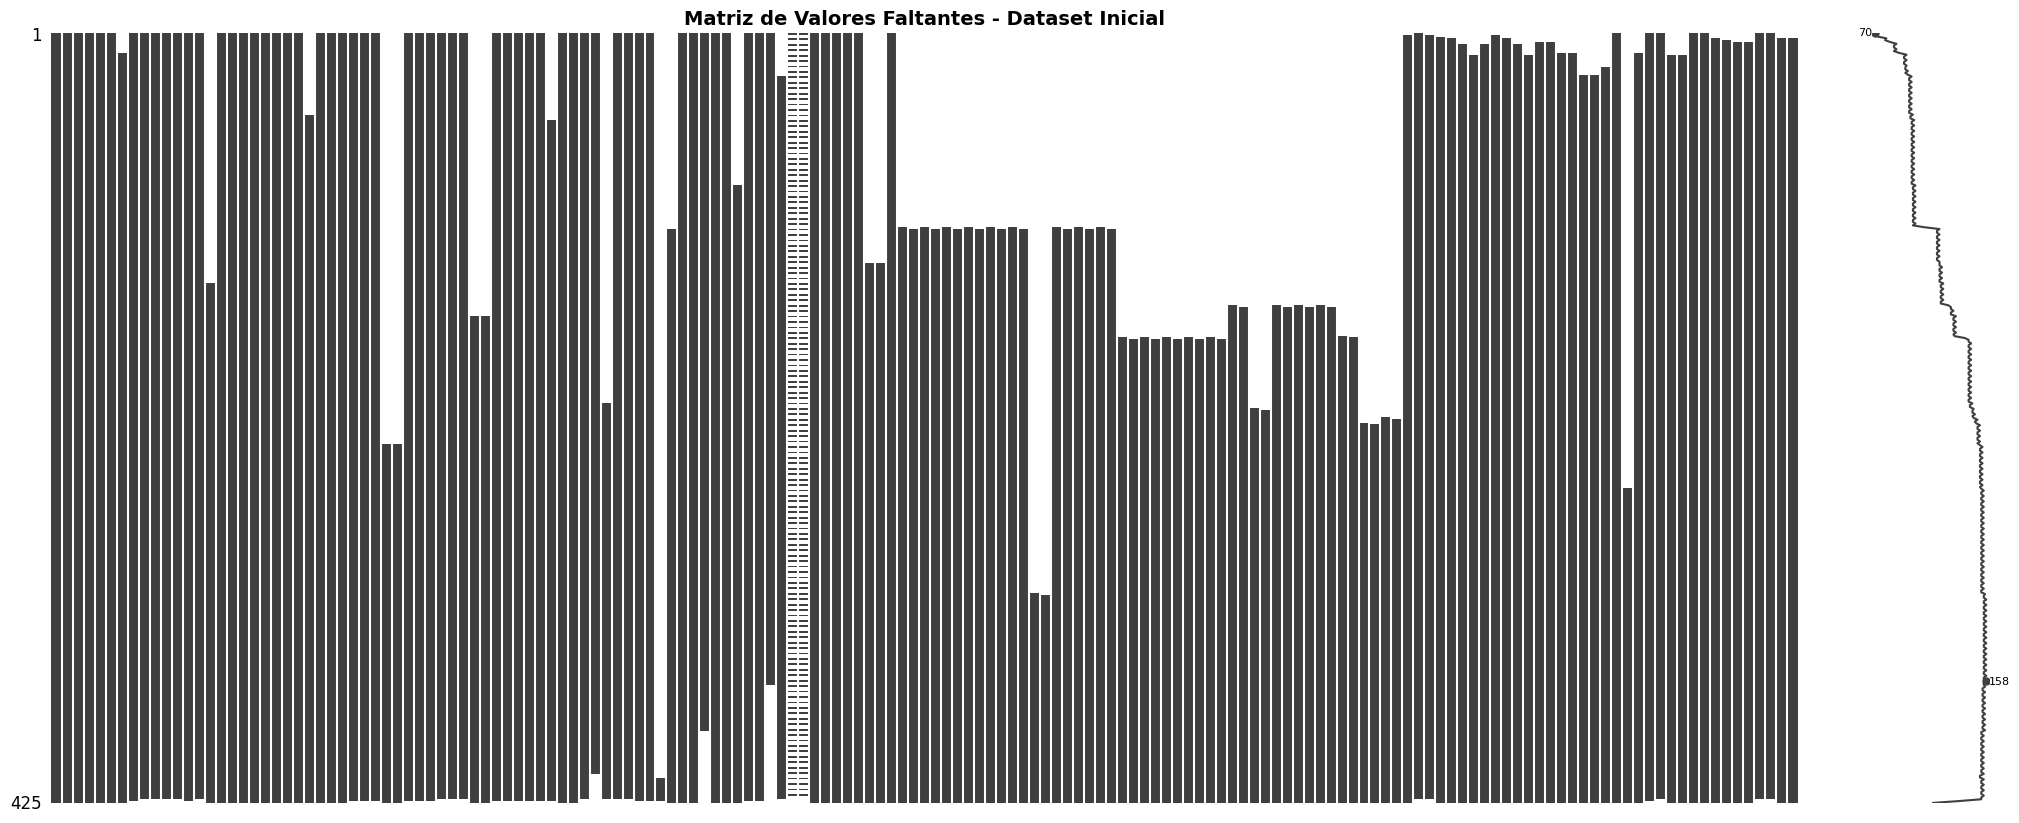

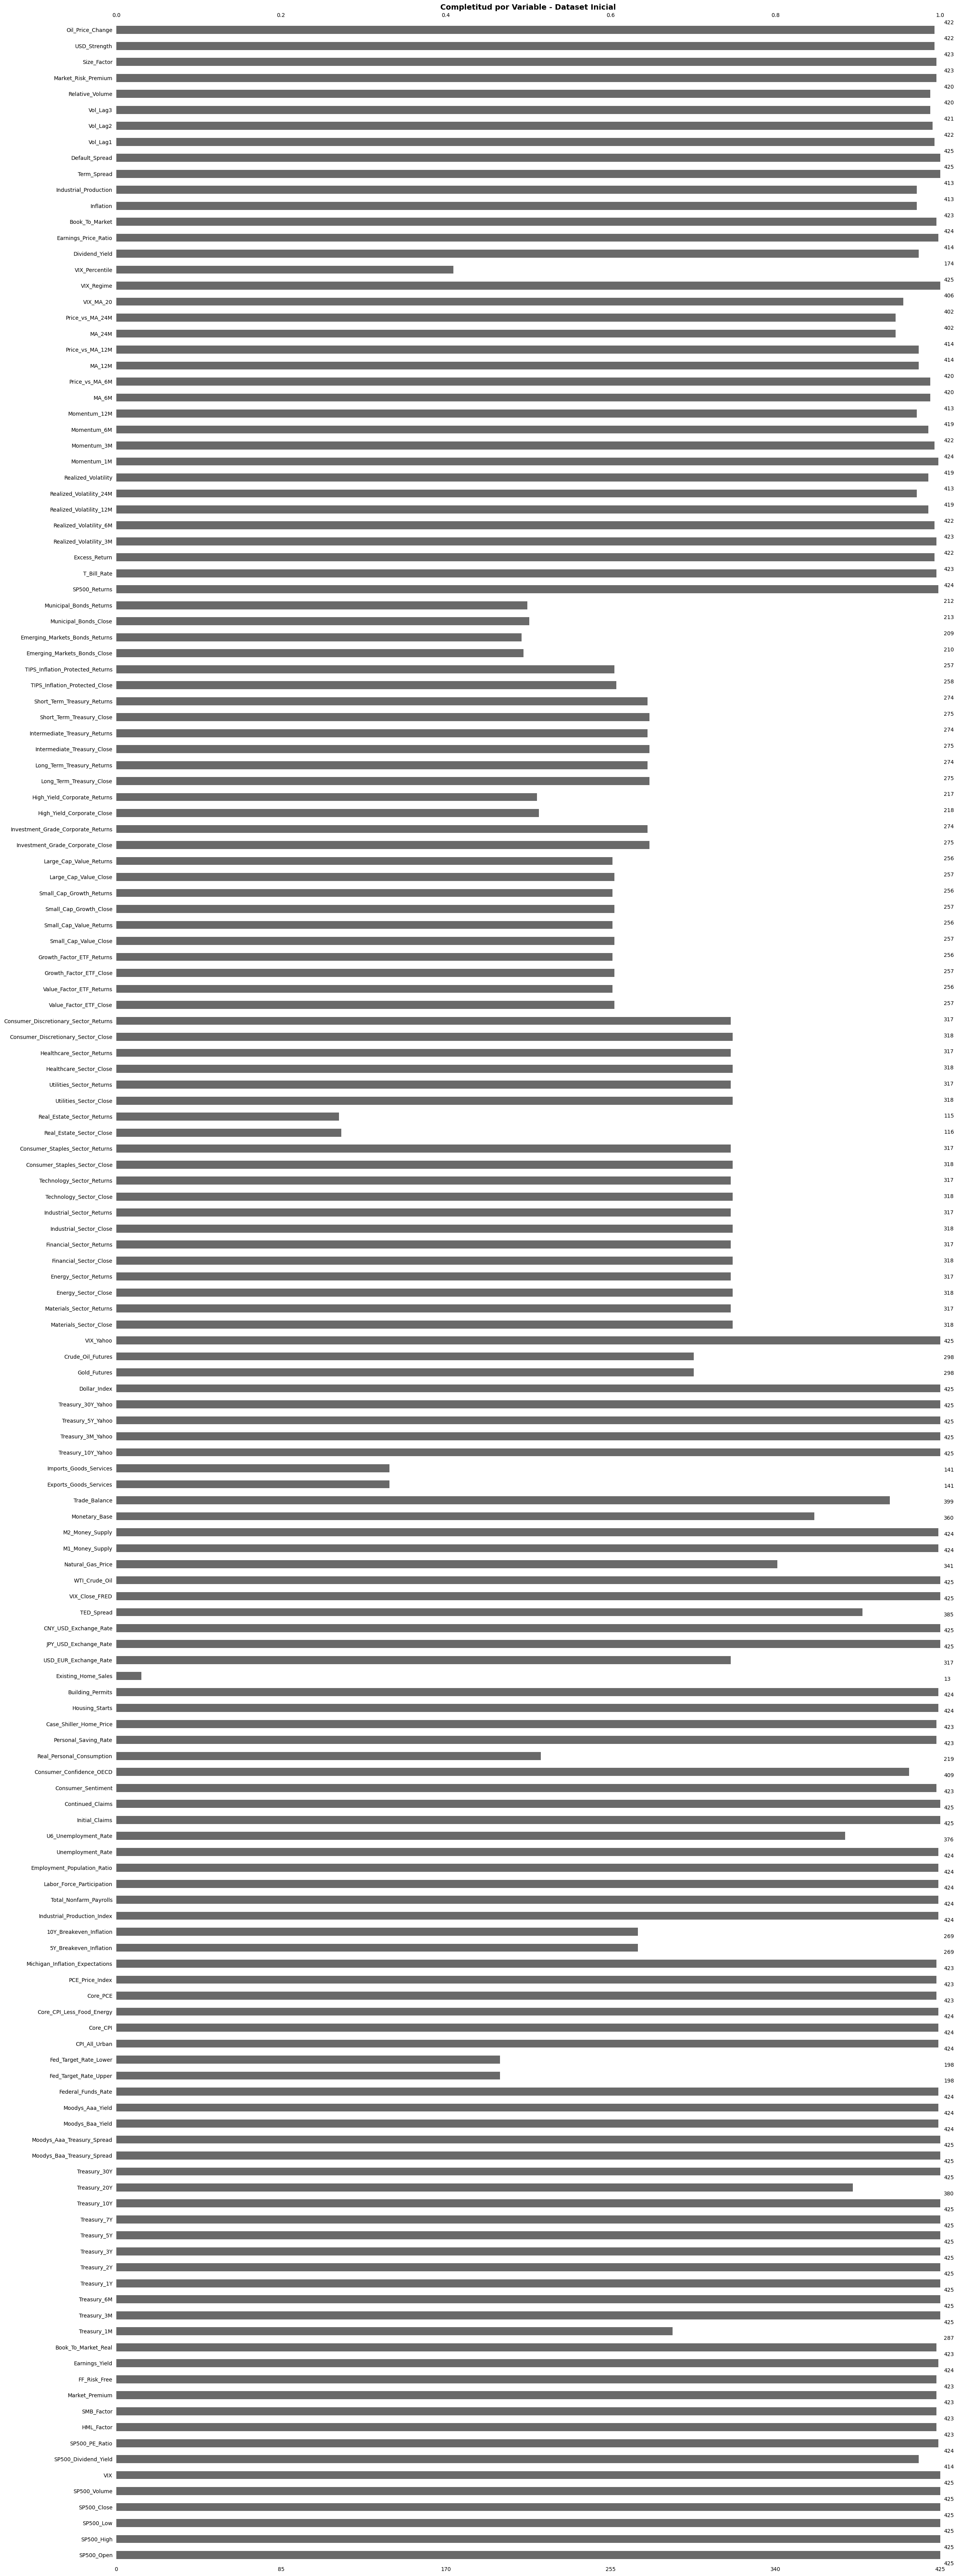


DATASET LISTO PARA ANÁLISIS EXPLORATORIO


In [ ]:
# =============================================================================
# ANÁLISIS DE ESTRATEGIAS REWARD-RISK TIMING EN ASIGNACIÓN DE PORTAFOLIOS
# Pre-procesamiento y construcción de dataset para modelos de machine learning
# =============================================================================

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
import requests
import time
from typing import Dict, Tuple, Optional, Union
warnings.filterwarnings('ignore')

# Configuración de librerías opcionales
try:
    import missingno as msno
    missingno_available = True
    print("Librería missingno disponible para análisis de valores faltantes")
except ImportError:
    missingno_available = False
    print("Librería missingno no disponible - análisis limitado de valores faltantes")

try:
    import pandas_datareader.data as web
    fred_available = True
    print("Librería pandas_datareader disponible para datos FRED")
except ImportError:
    fred_available = False
    print("Librería pandas_datareader no disponible - fuentes de datos limitadas")

print("="*70)
print("SISTEMA DE PRE-PROCESAMIENTO - ESTRATEGIAS REWARD-RISK TIMING")
print("Período de análisis: desde 1990 para máxima cobertura histórica")
print("Fuentes: FRED, Yahoo Finance, Factores Fama-French")
print("Objetivo: Variables para implementar timing strategies")
print("="*70)

# =============================================================================
# CONFIGURACIÓN DE FUENTES DE DATOS
# =============================================================================

class DataSourceConfig:
    """
    Configuración centralizada para el acceso a múltiples fuentes de datos financieros.
    Múltiples fuentes son necesarias para máxima cobertura temporal.
    """

    def __init__(self):
        self.alpha_vantage_key = None
        self.quandl_key = None
        self.fred_key = None
        self.ken_french_url = "https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/"
        self.multpl_url = "https://www.multpl.com/api/v1/"
        self.max_retries = 3
        self.retry_delay = 1

    def set_api_keys(self, alpha_vantage=None, quandl=None, fred=None):
        """Configura las claves API para acceso a fuentes de datos."""
        if alpha_vantage:
            self.alpha_vantage_key = alpha_vantage
        if quandl:
            self.quandl_key = quandl
        if fred:
            self.fred_key = fred

config = DataSourceConfig()

# =============================================================================
# FUNCIONES AUXILIARES PARA DESCARGA DE DATOS
# =============================================================================

def download_with_retry(func, *args, max_retries=3, delay=1, **kwargs):
    """Ejecuta una función con mecanismo de reintentos automáticos."""
    for attempt in range(max_retries):
        try:
            result = func(*args, **kwargs)
            if result is not None and not (hasattr(result, 'empty') and result.empty):
                return result
        except Exception as e:
            if attempt == max_retries - 1:
                print(f"Error final en {func.__name__}: {str(e)}")
                return None
            time.sleep(delay)
    return None

def safe_resample_monthly(series, method='last'):
    """Realiza remuestreo mensual seguro de series temporales."""
    if series is None or series.empty:
        return pd.Series(dtype=float)

    if method == 'last':
        return series.resample('M').last()
    elif method == 'mean':
        return series.resample('M').mean()
    elif method == 'first':
        return series.resample('M').first()
    else:
        return series.resample('M').last()

# =============================================================================
# DESCARGA DE DATOS FUNDAMENTALES DEL S&P 500
# =============================================================================

def obtener_datos_fundamentales_sp500(start_date='1990-01-01'):
    """Descarga datos fundamentales del S&P 500 desde múltiples fuentes."""
    print("DESCARGA DE DATOS FUNDAMENTALES DEL S&P 500")
    print("-" * 60)

    fundamentals = {}

    # Descarga de Dividend Yield utilizando múltiples metodologías
    print("1. Procesando Dividend Yield...")

    # Método 1: Cálculo desde Total Return vs Price Return
    try:
        print("   Calculando desde índices de retorno total...")

        sp500_tr = yf.download('^SP500TR', start=start_date, progress=False)
        sp500_pr = yf.download('^GSPC', start=start_date, progress=False)

        if not sp500_tr.empty and not sp500_pr.empty:
            if isinstance(sp500_tr.columns, pd.MultiIndex):
                sp500_tr.columns = sp500_tr.columns.droplevel(1)
            if isinstance(sp500_pr.columns, pd.MultiIndex):
                sp500_pr.columns = sp500_pr.columns.droplevel(1)

            common_dates = sp500_tr.index.intersection(sp500_pr.index)
            tr_aligned = sp500_tr.loc[common_dates, 'Close']
            pr_aligned = sp500_pr.loc[common_dates, 'Close']

            tr_returns = tr_aligned.pct_change(252)
            pr_returns = pr_aligned.pct_change(252)

            div_yield = (tr_returns - pr_returns) * 100
            div_yield = div_yield.clip(lower=0, upper=10)

            fundamentals['SP500_Dividend_Yield'] = div_yield
            print(f"   Dividend Yield calculado: {div_yield.count()} observaciones")
    except Exception as e:
        print(f"   Error en cálculo de dividend yield: {str(e)}")

    # Método 2: Estimación desde ETF SPY
    try:
        print("   Obteniendo datos desde ETF SPY...")
        spy = yf.Ticker("SPY")

        dividends = spy.dividends
        if not dividends.empty:
            spy_data = yf.download("SPY", start=start_date, progress=False)
            if not spy_data.empty:
                if isinstance(spy_data.columns, pd.MultiIndex):
                    spy_data.columns = spy_data.columns.droplevel(1)

                spy_prices = spy_data['Close']
                div_annual = dividends.rolling(window=252, min_periods=1).sum()

                common_dates = spy_prices.index.intersection(div_annual.index)
                if len(common_dates) > 0:
                    prices_aligned = spy_prices.loc[common_dates]
                    div_aligned = div_annual.loc[common_dates]

                    spy_div_yield = (div_aligned / prices_aligned) * 100
                    spy_div_yield = spy_div_yield.clip(lower=0, upper=10)

                    if 'SP500_Dividend_Yield' not in fundamentals:
                        fundamentals['SP500_Dividend_Yield'] = spy_div_yield
                        print(f"   SPY Dividend Yield: {spy_div_yield.count()} observaciones")
    except Exception as e:
        print(f"   Error con datos de SPY: {str(e)}")

    # Descarga de P/E Ratio
    print("2. Procesando P/E Ratio...")

    # Método 1: Datos desde FRED
    if fred_available:
        try:
            fred_pe_codes = ['SPASTT01USM657N', 'SP500', 'MULTPL/SP500_PE_RATIO_MONTH']

            for code in fred_pe_codes:
                try:
                    pe_data = web.DataReader(code, 'fred', start_date)
                    if not pe_data.empty:
                        fundamentals['SP500_PE_Ratio'] = pe_data.iloc[:, 0]
                        print(f"   P/E Ratio desde FRED ({code}): {pe_data.count().iloc[0]} obs")
                        break
                except:
                    continue

        except Exception as e:
            print(f"   FRED no disponible para P/E: {str(e)}")

    # Método 2: Aproximación usando utilidades corporativas
    if 'SP500_PE_Ratio' not in fundamentals:
        try:
            print("   Calculando P/E aproximado...")

            if fred_available:
                corp_profits = web.DataReader('CP', 'fred', start_date)
                sp500_level = yf.download('^GSPC', start=start_date, progress=False)

                if not corp_profits.empty and not sp500_level.empty:
                    if isinstance(sp500_level.columns, pd.MultiIndex):
                        sp500_level.columns = sp500_level.columns.droplevel(1)

                    corp_profits_norm = corp_profits.iloc[:, 0] / corp_profits.iloc[:, 0].mean()
                    typical_earnings = sp500_level['Close'] * 0.08

                    estimated_earnings = typical_earnings * corp_profits_norm
                    pe_approx = sp500_level['Close'] / estimated_earnings.reindex(sp500_level.index, method='ffill')
                    pe_approx = pe_approx.clip(lower=5, upper=50)

                    fundamentals['SP500_PE_Ratio'] = pe_approx
                    print(f"   P/E aproximado calculado: {pe_approx.count()} observaciones")

        except Exception as e:
            print(f"   Error en cálculo de P/E aproximado: {str(e)}")

    # Descarga de factores Fama-French para Book-to-Market
    print("3. Procesando factores Fama-French...")

    try:
        print("   Descargando factores Fama-French desde fuente oficial...")

        ff_url = "https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_CSV.zip"

        ff_data = pd.read_csv(ff_url, skiprows=3)

        ff_data = ff_data.iloc[:ff_data[ff_data.iloc[:, 0].astype(str).str.contains('Annual', na=False)].index[0]]
        ff_data.columns = ['Date', 'Mkt-RF', 'SMB', 'HML', 'RF']

        ff_data['Date'] = pd.to_datetime(ff_data['Date'].astype(str), format='%Y%m')
        ff_data = ff_data.set_index('Date')
        ff_data = ff_data.apply(pd.to_numeric, errors='coerce')

        ff_data = ff_data[ff_data.index >= start_date]

        fundamentals['HML_Factor'] = ff_data['HML'] / 100
        fundamentals['SMB_Factor'] = ff_data['SMB'] / 100
        fundamentals['Market_Premium'] = ff_data['Mkt-RF'] / 100
        fundamentals['FF_Risk_Free'] = ff_data['RF'] / 100

        print(f"   Factores Fama-French descargados: {len(ff_data)} observaciones")

    except Exception as e:
        print(f"   Error con factores Fama-French: {str(e)}")

        try:
            print("   Usando ETFs Value/Growth como proxy...")

            value_etf = yf.download("VTV", start=start_date, progress=False)
            growth_etf = yf.download("VUG", start=start_date, progress=False)

            if not value_etf.empty and not growth_etf.empty:
                if isinstance(value_etf.columns, pd.MultiIndex):
                    value_etf.columns = value_etf.columns.droplevel(1)
                    growth_etf.columns = growth_etf.columns.droplevel(1)

                value_ret = value_etf['Close'].resample('M').last().pct_change()
                growth_ret = growth_etf['Close'].resample('M').last().pct_change()

                hml_proxy = value_ret - growth_ret
                fundamentals['HML_Factor'] = hml_proxy

                print(f"   HML Factor desde ETFs: {hml_proxy.count()} observaciones")

        except Exception as e:
            print(f"   Error con ETFs Value/Growth: {str(e)}")

    # Cálculo de variables derivadas
    if 'SP500_PE_Ratio' in fundamentals:
        earnings_yield = 1 / fundamentals['SP500_PE_Ratio']
        earnings_yield = earnings_yield.clip(lower=0, upper=0.5)
        fundamentals['Earnings_Yield'] = earnings_yield
        print(f"4. Earnings Yield calculado: {earnings_yield.count()} observaciones")

    if 'HML_Factor' in fundamentals:
        hml_factor = fundamentals['HML_Factor']
        btm_ratio = 0.7 + (hml_factor - hml_factor.mean()) / hml_factor.std() * 0.3
        btm_ratio = btm_ratio.clip(lower=0.2, upper=1.5)
        fundamentals['Book_To_Market_Real'] = btm_ratio
        print(f"5. Book-to-Market Ratio calculado: {btm_ratio.count()} observaciones")

    print(f"\nDatos fundamentales obtenidos: {len(fundamentals)} series")
    return fundamentals

def obtener_datos_sectoriales_avanzados(start_date='1990-01-01'):
    """Descarga datos de ETFs sectoriales y de estilo de inversión."""
    print("DESCARGA DE DATOS SECTORIALES Y DE ESTILO")
    print("-" * 60)

    sectorial_data = {}

    # Definición de ETFs por categoría
    sector_etfs = {
        'XLB': 'Materials_Sector',
        'XLE': 'Energy_Sector',
        'XLF': 'Financial_Sector',
        'XLI': 'Industrial_Sector',
        'XLK': 'Technology_Sector',
        'XLP': 'Consumer_Staples_Sector',
        'XLRE': 'Real_Estate_Sector',
        'XLU': 'Utilities_Sector',
        'XLV': 'Healthcare_Sector',
        'XLY': 'Consumer_Discretionary_Sector'
    }

    style_etfs = {
        'VTV': 'Value_Factor_ETF',
        'VUG': 'Growth_Factor_ETF',
        'VB': 'Small_Cap_Value',
        'VBK': 'Small_Cap_Growth',
        'VV': 'Large_Cap_Value'
    }

    bond_etfs = {
        'LQD': 'Investment_Grade_Corporate',
        'HYG': 'High_Yield_Corporate',
        'TLT': 'Long_Term_Treasury',
        'IEF': 'Intermediate_Treasury',
        'SHY': 'Short_Term_Treasury',
        'TIP': 'TIPS_Inflation_Protected',
        'EMB': 'Emerging_Markets_Bonds',
        'MUB': 'Municipal_Bonds'
    }

    all_etfs = {**sector_etfs, **style_etfs, **bond_etfs}

    # Descarga de datos
    for symbol, name in all_etfs.items():
        try:
            data = download_with_retry(yf.download, symbol, start=start_date, progress=False)
            if data is not None and not data.empty:
                if isinstance(data.columns, pd.MultiIndex):
                    data.columns = data.columns.droplevel(1)

                sectorial_data[name] = data
                print(f"{name}: {len(data)} observaciones")
        except Exception as e:
            print(f"Error descargando {symbol}: {str(e)}")

    return sectorial_data

def obtener_datos_macro_completos(start_date='1990-01-01'):
    """Descarga conjunto comprehensivo de datos macroeconómicos desde FRED."""
    print("DESCARGA DE DATOS MACROECONÓMICOS")
    print("-" * 60)

    macro_data = {}

    if not fred_available:
        print("pandas_datareader no disponible - datos macroeconómicos limitados")
        return macro_data

    try:
        # Definición completa de códigos FRED por categoría
        fred_codes = {
            # Estructura temporal de tasas de interés
            'DGS1MO': 'Treasury_1M',
            'DGS3MO': 'Treasury_3M',
            'DGS6MO': 'Treasury_6M',
            'DGS1': 'Treasury_1Y',
            'DGS2': 'Treasury_2Y',
            'DGS3': 'Treasury_3Y',
            'DGS5': 'Treasury_5Y',
            'DGS7': 'Treasury_7Y',
            'DGS10': 'Treasury_10Y',
            'DGS20': 'Treasury_20Y',
            'DGS30': 'Treasury_30Y',

            # Spreads crediticios y riesgo
            'BAA10Y': 'Moodys_Baa_Treasury_Spread',
            'AAA10Y': 'Moodys_Aaa_Treasury_Spread',
            'BAA': 'Moodys_Baa_Yield',
            'AAA': 'Moodys_Aaa_Yield',

            # Política monetaria
            'FEDFUNDS': 'Federal_Funds_Rate',
            'DFEDTARU': 'Fed_Target_Rate_Upper',
            'DFEDTARL': 'Fed_Target_Rate_Lower',

            # Indicadores de inflación
            'CPIAUCSL': 'CPI_All_Urban',
            'CPILFESL': 'Core_CPI',
            'CPIULFSL': 'Core_CPI_Less_Food_Energy',
            'PCEPILFE': 'Core_PCE',
            'PCEPI': 'PCE_Price_Index',
            'MICH': 'Michigan_Inflation_Expectations',
            'T5YIE': '5Y_Breakeven_Inflation',
            'T10YIE': '10Y_Breakeven_Inflation',

            # Actividad económica real
            'INDPRO': 'Industrial_Production_Index',
            'CAPUTLB00004S': 'Capacity_Utilization',
            'PAYEMS': 'Total_Nonfarm_Payrolls',
            'CIVPART': 'Labor_Force_Participation',
            'EMRATIO': 'Employment_Population_Ratio',
            'UNRATE': 'Unemployment_Rate',
            'U6RATE': 'U6_Unemployment_Rate',
            'ICSA': 'Initial_Claims',
            'CCSA': 'Continued_Claims',

            # Confianza del consumidor e indicadores adelantados
            'UMCSENT': 'Consumer_Sentiment',
            'CSCICP03USM665S': 'Consumer_Confidence_OECD',
            'PCEC96': 'Real_Personal_Consumption',
            'PSAVERT': 'Personal_Saving_Rate',

            # Sector inmobiliario
            'CSUSHPINSA': 'Case_Shiller_Home_Price',
            'HOUST': 'Housing_Starts',
            'PERMIT': 'Building_Permits',
            'EXHOSLUSM495S': 'Existing_Home_Sales',

            # Variables financieras y tipos de cambio
            'DEXUSEU': 'USD_EUR_Exchange_Rate',
            'DEXJPUS': 'JPY_USD_Exchange_Rate',
            'DEXCHUS': 'CNY_USD_Exchange_Rate',
            'TEDRATE': 'TED_Spread',
            'VIXCLS': 'VIX_Close_FRED',

            # Materias primas
            'DCOILWTICO': 'WTI_Crude_Oil',
            'GOLDAMGBD228NLBM': 'Gold_Price_London',
            'DHHNGSP': 'Natural_Gas_Price',

            # Agregados monetarios
            'M1SL': 'M1_Money_Supply',
            'M2SL': 'M2_Money_Supply',
            'BASE': 'Monetary_Base',

            # Comercio internacional
            'BOPGSTB': 'Trade_Balance',
            'EXPGS': 'Exports_Goods_Services',
            'IMPGS': 'Imports_Goods_Services'
        }

        successful_downloads = 0

        # Descarga sistemática de todas las series
        for code, name in fred_codes.items():
            try:
                series = web.DataReader(code, 'fred', start_date)
                if not series.empty:
                    macro_data[name] = series.iloc[:, 0]
                    successful_downloads += 1
                    print(f"{name}: {len(series)} observaciones")
                time.sleep(0.1)  # Prevenir sobrecarga del servidor
            except Exception as e:
                print(f"Error descargando {code}: {str(e)}")

        print(f"\nFRED: {successful_downloads}/{len(fred_codes)} series descargadas")

    except Exception as e:
        print(f"Error general con FRED: {str(e)}")

    # Datos complementarios desde Yahoo Finance
    additional_symbols = {
        '^TNX': 'Treasury_10Y_Yahoo',
        '^IRX': 'Treasury_3M_Yahoo',
        '^FVX': 'Treasury_5Y_Yahoo',
        '^TYX': 'Treasury_30Y_Yahoo',
        'DX-Y.NYB': 'Dollar_Index',
        'GC=F': 'Gold_Futures',
        'CL=F': 'Crude_Oil_Futures',
        '^VIX': 'VIX_Yahoo'
    }

    for symbol, name in additional_symbols.items():
        try:
            data = download_with_retry(yf.download, symbol, start=start_date, progress=False)
            if data is not None and not data.empty:
                if isinstance(data.columns, pd.MultiIndex):
                    data.columns = data.columns.droplevel(1)

                if 'Close' in data.columns:
                    macro_data[name] = data['Close']
                    print(f"{name}: {len(data)} observaciones")
        except Exception as e:
            print(f"Error descargando {symbol}: {str(e)}")

    return macro_data

# =============================================================================
# INTEGRACIÓN Y CONSTRUCCIÓN DEL DATASET
# =============================================================================

def crear_dataset_integrado_avanzado(start_date='1990-01-01', end_date=None):
    """Integra todas las fuentes de datos en un dataset mensual unificado."""
    print("INTEGRACIÓN DE FUENTES DE DATOS")
    print("=" * 70)

    if end_date is None:
        end_date = datetime.datetime.now().strftime('%Y-%m-%d')

    # Fase 1: Datos básicos del mercado de valores
    print("\nFASE 1: DATOS BÁSICOS DEL MERCADO")
    print("-" * 50)

    sp500, vix = obtener_datos_sp500(start_date, end_date)
    if sp500 is None:
        raise ValueError("No se pudieron obtener datos del S&P 500")

    # Fase 2: Datos fundamentales del mercado
    print("\nFASE 2: DATOS FUNDAMENTALES")
    print("-" * 50)

    fundamentals = obtener_datos_fundamentales_sp500(start_date)

    # Fase 3: Datos macroeconómicos
    print("\nFASE 3: DATOS MACROECONÓMICOS")
    print("-" * 50)

    macro_data = obtener_datos_macro_completos(start_date)

    # Fase 4: Datos sectoriales
    print("\nFASE 4: DATOS SECTORIALES")
    print("-" * 50)

    sectorial_data = obtener_datos_sectoriales_avanzados(start_date)

    # Fase 5: Construcción del dataset mensual integrado
    print("\nFASE 5: CONSTRUCCIÓN DEL DATASET MENSUAL")
    print("-" * 50)

    # Preparación de datos base del S&P 500
    standard_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
    available_cols = [col for col in standard_cols if col in sp500.columns]

    if isinstance(sp500.columns, pd.MultiIndex):
        sp500.columns = sp500.columns.droplevel(1)

    # Definición de métodos de agregación por tipo de variable
    agg_dict = {}
    column_mapping = {}

    for col in available_cols:
        if col == 'Open':
            agg_dict[col] = 'first'
            column_mapping[col] = 'SP500_Open'
        elif col == 'High':
            agg_dict[col] = 'max'
            column_mapping[col] = 'SP500_High'
        elif col == 'Low':
            agg_dict[col] = 'min'
            column_mapping[col] = 'SP500_Low'
        elif col in ['Close', 'Adj Close']:
            agg_dict[col] = 'last'
            column_mapping[col] = f'SP500_{col.replace(" ", "_")}'
        elif col == 'Volume':
            agg_dict[col] = 'mean'
            column_mapping[col] = 'SP500_Volume'

    # Creación del DataFrame base mensual
    df_monthly = sp500.resample('M').agg(agg_dict)
    df_monthly.columns = [column_mapping[col] for col in df_monthly.columns]

    print(f"Dataset base S&P 500: {len(df_monthly)} observaciones")

    # Integración del VIX
    if vix is not None and not vix.empty:
        if isinstance(vix.columns, pd.MultiIndex):
            vix.columns = vix.columns.droplevel(1)
        if 'Close' in vix.columns:
            df_monthly['VIX'] = safe_resample_monthly(vix['Close'])
            print(f"VIX integrado: {df_monthly['VIX'].count()} observaciones")

    # Integración de datos fundamentales
    print("Integrando datos fundamentales...")
    for key, series in fundamentals.items():
        monthly_series = safe_resample_monthly(series)
        if not monthly_series.empty:
            df_monthly[key] = monthly_series
            print(f"  {key}: {monthly_series.count()} observaciones")

    # Integración de datos macroeconómicos
    print("Integrando datos macroeconómicos...")
    macro_count = 0
    for key, series in macro_data.items():
        monthly_series = safe_resample_monthly(series)
        if not monthly_series.empty:
            df_monthly[key] = monthly_series
            macro_count += 1
    print(f"  {macro_count} series macroeconómicas integradas")

    # Integración de datos sectoriales
    print("Integrando datos sectoriales...")
    sector_count = 0
    for key, data in sectorial_data.items():
        if 'Close' in data.columns:
            monthly_series = safe_resample_monthly(data['Close'])
            if not monthly_series.empty:
                df_monthly[f"{key}_Close"] = monthly_series

                monthly_returns = monthly_series.pct_change()
                df_monthly[f"{key}_Returns"] = monthly_returns
                sector_count += 1
    print(f"  {sector_count} series sectoriales integradas")

    # Limpieza final del dataset
    initial_rows = len(df_monthly)
    df_monthly = df_monthly.dropna(how='all')
    final_rows = len(df_monthly)

    print(f"\nDataset integrado completado:")
    print(f"  Dimensiones finales: {final_rows} filas × {df_monthly.shape[1]} columnas")
    print(f"  Filas eliminadas (completamente vacías): {initial_rows - final_rows}")

    return df_monthly

def construir_variables_financieras_avanzadas(df):
    """Construye variables financieras derivadas utilizando datos reales cuando están disponibles."""
    print("CONSTRUCCIÓN DE VARIABLES FINANCIERAS DERIVADAS")
    print("-" * 60)

    df_features = df.copy()

    # Identificación de la columna de precios principal
    sp500_price_col = None
    for col in ['SP500_Adj_Close', 'SP500_Close']:
        if col in df_features.columns:
            sp500_price_col = col
            break

    if sp500_price_col is None:
        raise ValueError("No se encontró columna de precios del S&P 500")

    print(f"Precio base seleccionado: {sp500_price_col}")

    # Construcción de variables objetivo
    print("1. Variables objetivo y de retorno...")

    df_features['SP500_Returns'] = df_features[sp500_price_col].pct_change()

    # Determinación de la tasa libre de riesgo
    risk_free_col = None
    rf_sources = ['FF_Risk_Free', 'Treasury_3M', 'Treasury_1M', 'Federal_Funds_Rate']

    for source in rf_sources:
        if source in df_features.columns and not risk_free_col:
            df_features['T_Bill_Rate'] = df_features[source] / 100 / 12
            risk_free_col = source
            print(f"   Tasa libre de riesgo desde: {source}")
            break

    if not risk_free_col:
        df_features['T_Bill_Rate'] = 0.02 / 12
        print("   Tasa libre de riesgo: valor fijo 2% anual")

    # Variable objetivo principal: Excess Returns
    df_features['Excess_Return'] = df_features['SP500_Returns'] - df_features['T_Bill_Rate']

    # Construcción de medidas de volatilidad realizada
    for window in [3, 6, 12, 24]:
        vol_col = f'Realized_Volatility_{window}M'
        df_features[vol_col] = df_features['SP500_Returns'].rolling(
            window=window, min_periods=max(2, window//2)
        ).std() * np.sqrt(12)

    # Variable objetivo secundaria: Volatilidad
    df_features['Realized_Volatility'] = df_features['Realized_Volatility_12M']

    print(f"   Excess_Return: {df_features['Excess_Return'].count()} observaciones")
    print(f"   Realized_Volatility: {df_features['Realized_Volatility'].count()} observaciones")

    # Variables específicas para timing strategies
    print("2. Variables específicas para timing strategies...")

    # Momentum signals en múltiples horizontes
    for months in [1, 3, 6, 12]:
        momentum_col = f'Momentum_{months}M'
        df_features[momentum_col] = df_features[sp500_price_col].pct_change(months)

    # Relative strength vs moving averages
    for window in [6, 12, 24]:
        ma_col = f'MA_{window}M'
        df_features[ma_col] = df_features[sp500_price_col].rolling(window).mean()
        df_features[f'Price_vs_MA_{window}M'] = df_features[sp500_price_col] / df_features[ma_col] - 1

    # Volatility regime indicators
    if 'VIX' in df_features.columns:
        df_features['VIX_MA_20'] = df_features['VIX'].rolling(20).mean()
        df_features['VIX_Regime'] = (df_features['VIX'] > df_features['VIX_MA_20']).astype(int)
        df_features['VIX_Percentile'] = df_features['VIX'].rolling(252).rank(pct=True)

    print(f"   Variables de timing construidas: momentum, relative strength, volatility regime")

    # Construcción de variables fundamentales
    print("3. Variables fundamentales de valoración...")

    # Dividend Yield con múltiples fuentes
    if 'SP500_Dividend_Yield' in df_features.columns:
        df_features['Dividend_Yield'] = df_features['SP500_Dividend_Yield']
        print(f"   Dividend Yield real: {df_features['Dividend_Yield'].count()} obs")
    else:
        if 'VIX' in df_features.columns:
            df_features['Dividend_Yield'] = 3.5 - (df_features['VIX'] - 20) / 10
            df_features['Dividend_Yield'] = df_features['Dividend_Yield'].clip(1.0, 6.0)
            print("   Dividend Yield: aproximación basada en VIX")
        else:
            df_features['Dividend_Yield'] = 2.0
            print("   Dividend Yield: valor constante")

    # Earnings Price Ratio
    if 'SP500_PE_Ratio' in df_features.columns:
        df_features['Earnings_Price_Ratio'] = 1 / df_features['SP500_PE_Ratio']
        print(f"   Earnings/Price Ratio real: {df_features['Earnings_Price_Ratio'].count()} obs")
    elif 'Earnings_Yield' in df_features.columns:
        df_features['Earnings_Price_Ratio'] = df_features['Earnings_Yield']
        print(f"   Earnings/Price Ratio desde Earnings Yield: {df_features['Earnings_Price_Ratio'].count()} obs")
    else:
        if 'Industrial_Production_Index' in df_features.columns:
            ip_growth = df_features['Industrial_Production_Index'].pct_change(12)
            df_features['Earnings_Price_Ratio'] = 0.06 + ip_growth * 0.5
            df_features['Earnings_Price_Ratio'] = df_features['Earnings_Price_Ratio'].clip(0.02, 0.15)
            print("   Earnings/Price Ratio: proxy con producción industrial")
        else:
            df_features['Earnings_Price_Ratio'] = 0.06
            print("   Earnings/Price Ratio: valor constante")

    # Book to Market Ratio
    if 'Book_To_Market_Real' in df_features.columns:
        df_features['Book_To_Market'] = df_features['Book_To_Market_Real']
        print(f"   Book-to-Market real: {df_features['Book_To_Market'].count()} obs")
    elif 'HML_Factor' in df_features.columns:
        hml = df_features['HML_Factor']
        df_features['Book_To_Market'] = 0.7 + hml * 2
        df_features['Book_To_Market'] = df_features['Book_To_Market'].clip(0.3, 1.3)
        print(f"   Book-to-Market desde HML Factor: {df_features['Book_To_Market'].count()} obs")
    else:
        if 'Unemployment_Rate' in df_features.columns:
            df_features['Book_To_Market'] = 0.6 + (df_features['Unemployment_Rate'] - 5) / 10
            df_features['Book_To_Market'] = df_features['Book_To_Market'].clip(0.3, 1.2)
            print("   Book-to-Market: función del desempleo")
        else:
            df_features['Book_To_Market'] = 0.7
            print("   Book-to-Market: valor constante")

    # Construcción de variables macroeconómicas
    print("4. Variables macroeconómicas...")

    # Medidas de inflación
    inflation_sources = ['Core_CPI', 'CPI_All_Urban', 'Core_PCE', 'PCE_Price_Index']
    inflation_set = False

    for source in inflation_sources:
        if source in df_features.columns and not inflation_set:
            df_features['Inflation'] = df_features[source].pct_change(12) * 100
            print(f"   Inflación desde: {source}")
            inflation_set = True
            break

    if not inflation_set:
        df_features['Inflation'] = 2.0
        print("   Inflación: valor constante 2%")

    # Producción Industrial
    if 'Industrial_Production_Index' in df_features.columns:
        df_features['Industrial_Production'] = df_features['Industrial_Production_Index'].pct_change(12) * 100
        print(f"   Producción Industrial real: {df_features['Industrial_Production'].count()} obs")
    else:
        if 'Industrial_Sector_Close' in df_features.columns:
            df_features['Industrial_Production'] = df_features['Industrial_Sector_Close'].pct_change(12) * 100
            print("   Producción Industrial: proxy con ETF XLI")
        else:
            df_features['Industrial_Production'] = 2.0
            print("   Producción Industrial: valor constante")

    # Term Spread (estructura temporal de tasas)
    term_combinations = [
        ('Treasury_10Y', 'Treasury_3M'),
        ('Treasury_10Y', 'Treasury_2Y'),
        ('Treasury_5Y', 'Treasury_3M'),
        ('Treasury_10Y_Yahoo', 'Treasury_3M_Yahoo')
    ]

    term_spread_set = False
    for long_term, short_term in term_combinations:
        if long_term in df_features.columns and short_term in df_features.columns and not term_spread_set:
            df_features['Term_Spread'] = df_features[long_term] - df_features[short_term]
            print(f"   Term Spread calculado: {long_term} - {short_term}")
            term_spread_set = True
            break

    if not term_spread_set:
        df_features['Term_Spread'] = 2.0
        print("   Term Spread: valor constante")

    # Default Spread (riesgo crediticio)
    default_sources = [
        'Moodys_Baa_Treasury_Spread',
        'Moodys_Aaa_Treasury_Spread',
        'TED_Spread'
    ]

    default_set = False
    for source in default_sources:
        if source in df_features.columns and not default_set:
            df_features['Default_Spread'] = df_features[source]
            print(f"   Default Spread desde: {source}")
            default_set = True
            break

    if not default_set:
        if 'Moodys_Baa_Yield' in df_features.columns and 'Treasury_10Y' in df_features.columns:
            df_features['Default_Spread'] = df_features['Moodys_Baa_Yield'] - df_features['Treasury_10Y']
            print("   Default Spread calculado: Baa - Treasury 10Y")
        else:
            df_features['Default_Spread'] = 1.5
            print("   Default Spread: valor constante")

    # Construcción de variables técnicas y de momentum
    print("5. Variables técnicas y de momentum...")

    # Variables de volatilidad con rezagos
    vol_short = df_features['SP500_Returns'].rolling(window=3, min_periods=2).std() * np.sqrt(12)
    for lag in [1, 2, 3]:
        df_features[f'Vol_Lag{lag}'] = vol_short.shift(lag)

    # Volumen relativo
    if 'SP500_Volume' in df_features.columns:
        vol_ma = df_features['SP500_Volume'].rolling(window=12, min_periods=6).mean()
        df_features['Relative_Volume'] = df_features['SP500_Volume'] / vol_ma
        print("   Relative Volume calculado con datos reales")
    else:
        ret_vol = df_features['SP500_Returns'].abs()
        ret_vol_ma = ret_vol.rolling(window=12, min_periods=6).mean()
        df_features['Relative_Volume'] = ret_vol / ret_vol_ma
        print("   Relative Volume: proxy con volatilidad de retornos")

    # Construcción de factores adicionales
    print("6. Factores de riesgo adicionales...")

    # Market Risk Premium
    if 'Market_Premium' in df_features.columns:
        df_features['Market_Risk_Premium'] = df_features['Market_Premium']
        print(f"   Market Risk Premium real: {df_features['Market_Risk_Premium'].count()} obs")
    else:
        df_features['Market_Risk_Premium'] = df_features['SP500_Returns'] - df_features['T_Bill_Rate']
        print("   Market Risk Premium calculado")

    # Size Factor
    if 'SMB_Factor' in df_features.columns:
        df_features['Size_Factor'] = df_features['SMB_Factor']
        print(f"   Size Factor real: {df_features['Size_Factor'].count()} obs")

    # Fortaleza del dólar
    if 'Dollar_Index' in df_features.columns:
        df_features['USD_Strength'] = df_features['Dollar_Index'].pct_change(3)
        print(f"   USD Strength: {df_features['USD_Strength'].count()} obs")

    # Impacto del precio del petróleo
    oil_cols = ['WTI_Crude_Oil', 'Crude_Oil_Futures']
    for oil_col in oil_cols:
        if oil_col in df_features.columns:
            df_features['Oil_Price_Change'] = df_features[oil_col].pct_change(3)
            print(f"   Oil Price Change desde: {oil_col}")
            break

    print(f"\nVariables financieras construidas: {df_features.shape[1]} columnas totales")

    return df_features

# =============================================================================
# FUNCIÓN PRINCIPAL DE PRE-PROCESAMIENTO
# =============================================================================

def crear_dataset_final():
    """Ejecuta el pipeline completo de pre-procesamiento de datos financieros."""
    print("PIPELINE DE PRE-PROCESAMIENTO PARA TIMING STRATEGIES")
    print("=" * 70)

    try:
        # Etapa 1: Integración de múltiples fuentes de datos
        print("\nETAPA 1: INTEGRACIÓN DE FUENTES DE DATOS")
        df_integrado = crear_dataset_integrado_avanzado()

        # Etapa 2: Construcción de variables financieras derivadas
        print("\nETAPA 2: CONSTRUCCIÓN DE VARIABLES FINANCIERAS")
        df_final = construir_variables_financieras_avanzadas(df_integrado)

        # Reporte final del dataset
        print("\nDATASET FINAL COMPLETADO")
        print("="*70)
        print(f"Período de análisis: {df_final.index[0]} a {df_final.index[-1]}")
        print(f"Total de variables: {len(df_final.columns)}")
        print(f"Total de observaciones: {len(df_final)}")

        # Variables críticas para timing strategies
        timing_vars = [col for col in df_final.columns if any(keyword in col.lower()
                      for keyword in ['momentum', 'vix', 'spread', 'volatility', 'excess_return'])]
        print(f"Variables específicas para timing: {len(timing_vars)}")

        # Análisis de completitud de datos
        print("\nANÁLISIS DE COMPLETITUD:")
        print("-" * 50)
        for col in df_final.columns:
            valid_count = df_final[col].count()
            total_count = len(df_final)
            completeness = (valid_count / total_count) * 100
            if completeness < 90:  # Solo mostrar variables con problemas
                print(f"{col:<35}: {completeness:>5.1f}% (Baja completitud)")

        # Estadísticas finales de completitud
        total_cells = df_final.shape[0] * df_final.shape[1]
        missing_cells = df_final.isna().sum().sum()
        completeness_overall = ((total_cells - missing_cells) / total_cells) * 100

        print(f"\nESTADÍSTICAS FINALES:")
        print("-" * 50)
        print(f"Completitud general del dataset: {completeness_overall:.1f}%")
        print(f"Dataset listo para análisis de timing strategies")

        print("\nPIPELINE DE PRE-PROCESAMIENTO COMPLETADO")
        print("="*70)

        return df_final

    except Exception as e:
        print(f"Error en pipeline de pre-procesamiento: {str(e)}")
        raise

# =============================================================================
# FUNCIONES AUXILIARES PARA DATOS BÁSICOS
# =============================================================================

def obtener_datos_sp500(start_date='1990-01-01', end_date=None):
    """Descarga datos históricos del S&P 500 y VIX desde Yahoo Finance."""
    if end_date is None:
        end_date = datetime.datetime.now().strftime('%Y-%m-%d')

    print(f"Descargando datos de mercado desde {start_date} hasta {end_date}")

    try:
        # Descarga del S&P 500
        sp500 = yf.download('^GSPC', start=start_date, end=end_date, progress=False)

        if sp500.empty:
            print("No se obtuvieron datos para S&P 500")
            return None, None

        if isinstance(sp500.columns, pd.MultiIndex):
            sp500.columns = sp500.columns.droplevel(1)

        print(f"S&P 500: {len(sp500)} observaciones descargadas")

        # Descarga del VIX
        vix = yf.download('^VIX', start=start_date, end=end_date, progress=False)

        if not vix.empty and isinstance(vix.columns, pd.MultiIndex):
            vix.columns = vix.columns.droplevel(1)

        print(f"VIX: {len(vix)} observaciones descargadas")

        return sp500, vix

    except Exception as e:
        print(f"Error descargando datos de mercado: {str(e)}")
        return None, None

# =============================================================================
# EJECUCIÓN PRINCIPAL
# =============================================================================

if __name__ == "__main__":
    # Verificación de dependencias
    print("Verificando dependencias del sistema...")

    required_libs = ['pandas', 'numpy', 'yfinance', 'matplotlib', 'seaborn']
    for lib in required_libs:
        try:
            __import__(lib)
            print(f"Librería {lib}: disponible")
        except ImportError:
            print(f"Error: Librería {lib} requerida no disponible")

    # Ejecución del pipeline completo
    dataset_final = crear_dataset_final()

    # Variables globales para fácil acceso
    variables_objetivo = ['Excess_Return', 'Realized_Volatility']
    variables_timing = [col for col in dataset_final.columns if any(keyword in col.lower()
                       for keyword in ['momentum', 'vix', 'spread', 'volatility'])]

    print(f"\nVARIABLES DISPONIBLES PARA TIMING STRATEGIES:")
    print(f"   dataset_final: Dataset completo ({dataset_final.shape})")
    print(f"   variables_objetivo: {variables_objetivo}")
    print(f"   variables_timing: {len(variables_timing)} variables específicas para timing")
    # =============================================================================
    # VISUALIZACIÓN DE VALORES FALTANTES - DATASET INICIAL
    # =============================================================================

    print(f"\nVISUALIZACIÓN DE VALORES FALTANTES - DATASET INICIAL")
    print("="*70)

    # Análisis de completitud de datos
    total_cells = dataset_final.shape[0] * dataset_final.shape[1]
    missing_cells = dataset_final.isna().sum().sum()
    completeness_overall = ((total_cells - missing_cells) / total_cells) * 100

    print(f"Estadísticas de completitud del dataset inicial:")
    print(f"  Total de celdas: {total_cells:,}")
    print(f"  Celdas con datos válidos: {total_cells - missing_cells:,}")
    print(f"  Celdas con valores faltantes: {missing_cells:,}")
    print(f"  Completitud general: {completeness_overall:.1f}%")

    # Análisis por variable
    missing_by_var = dataset_final.isnull().sum()
    vars_with_missing = missing_by_var[missing_by_var > 0].sort_values(ascending=False)

    if len(vars_with_missing) > 0:
        print(f"\nVariables con valores faltantes ({len(vars_with_missing)} de {len(dataset_final.columns)}):")
        print("-" * 70)
        for var, count in vars_with_missing.items():
            pct = (count / len(dataset_final)) * 100
            print(f"{var:<35}: {count:>4} ({pct:>5.1f}%)")
    else:
        print(f"\nDataset inicial sin valores faltantes")

    # Visualización con missingno si está disponible
    if missingno_available and len(vars_with_missing) > 0:
        print(f"\nGenerando visualización de valores faltantes...")

        # Matriz de valores faltantes
        plt.figure(figsize=(15, 8))
        msno.matrix(dataset_final, fontsize=10)
        plt.title('Matriz de Valores Faltantes - Dataset Inicial', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

        # Gráfico de barras de completitud
        plt.figure(figsize=(15, 6))
        msno.bar(dataset_final, fontsize=10)
        plt.title('Completitud por Variable - Dataset Inicial', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

    print(f"\nDATASET LISTO PARA ANÁLISIS EXPLORATORIO")

## 2. Análisis Exploratorio de Datos <a name="seccion2"></a>
Incluir en esta sección:
- Análisis descriptivo de cada atributo y la variable objetivo
    - Distribución variables contínuas
    - Conteo de presencia de cada estado en variables categóricas
    - Evaluar potencial predictivo de atributos sobre target:
        - Matriz de correlación
        - Distribuciones por clase
- Decisiones de imputación de missings y depuración de outliers

ANÁLISIS EXPLORATORIO DE DATOS - TIMING STRATEGIES
Enfoque: Variables para implementar estrategias reward-risk timing
Objetivo: Selección de 15-25 variables finales para modelado
Librería missingno disponible
Librería statsmodels disponible
EJECUTANDO ANÁLISIS EXPLORATORIO - TIMING STRATEGIES
CARGANDO DATOS OPTIMIZADOS PARA TIMING STRATEGIES
------------------------------------------------------------
CREANDO DATASET OPTIMIZADO PARA TIMING STRATEGIES
1. DESCARGANDO VARIABLES CON MÁXIMA COBERTURA HISTÓRICA
------------------------------------------------------------
Descargado Treasury_3M              : 9235 obs desde 1990-01
Descargado Treasury_6M              : 9235 obs desde 1990-01
Descargado Treasury_1Y              : 9235 obs desde 1990-01
Descargado Treasury_5Y              : 9235 obs desde 1990-01
Descargado Treasury_10Y             : 9235 obs desde 1990-01
Descargado Treasury_30Y             : 9235 obs desde 1990-01
Descargado Federal_Funds_Rate       :  424 obs desde 1990-01
D

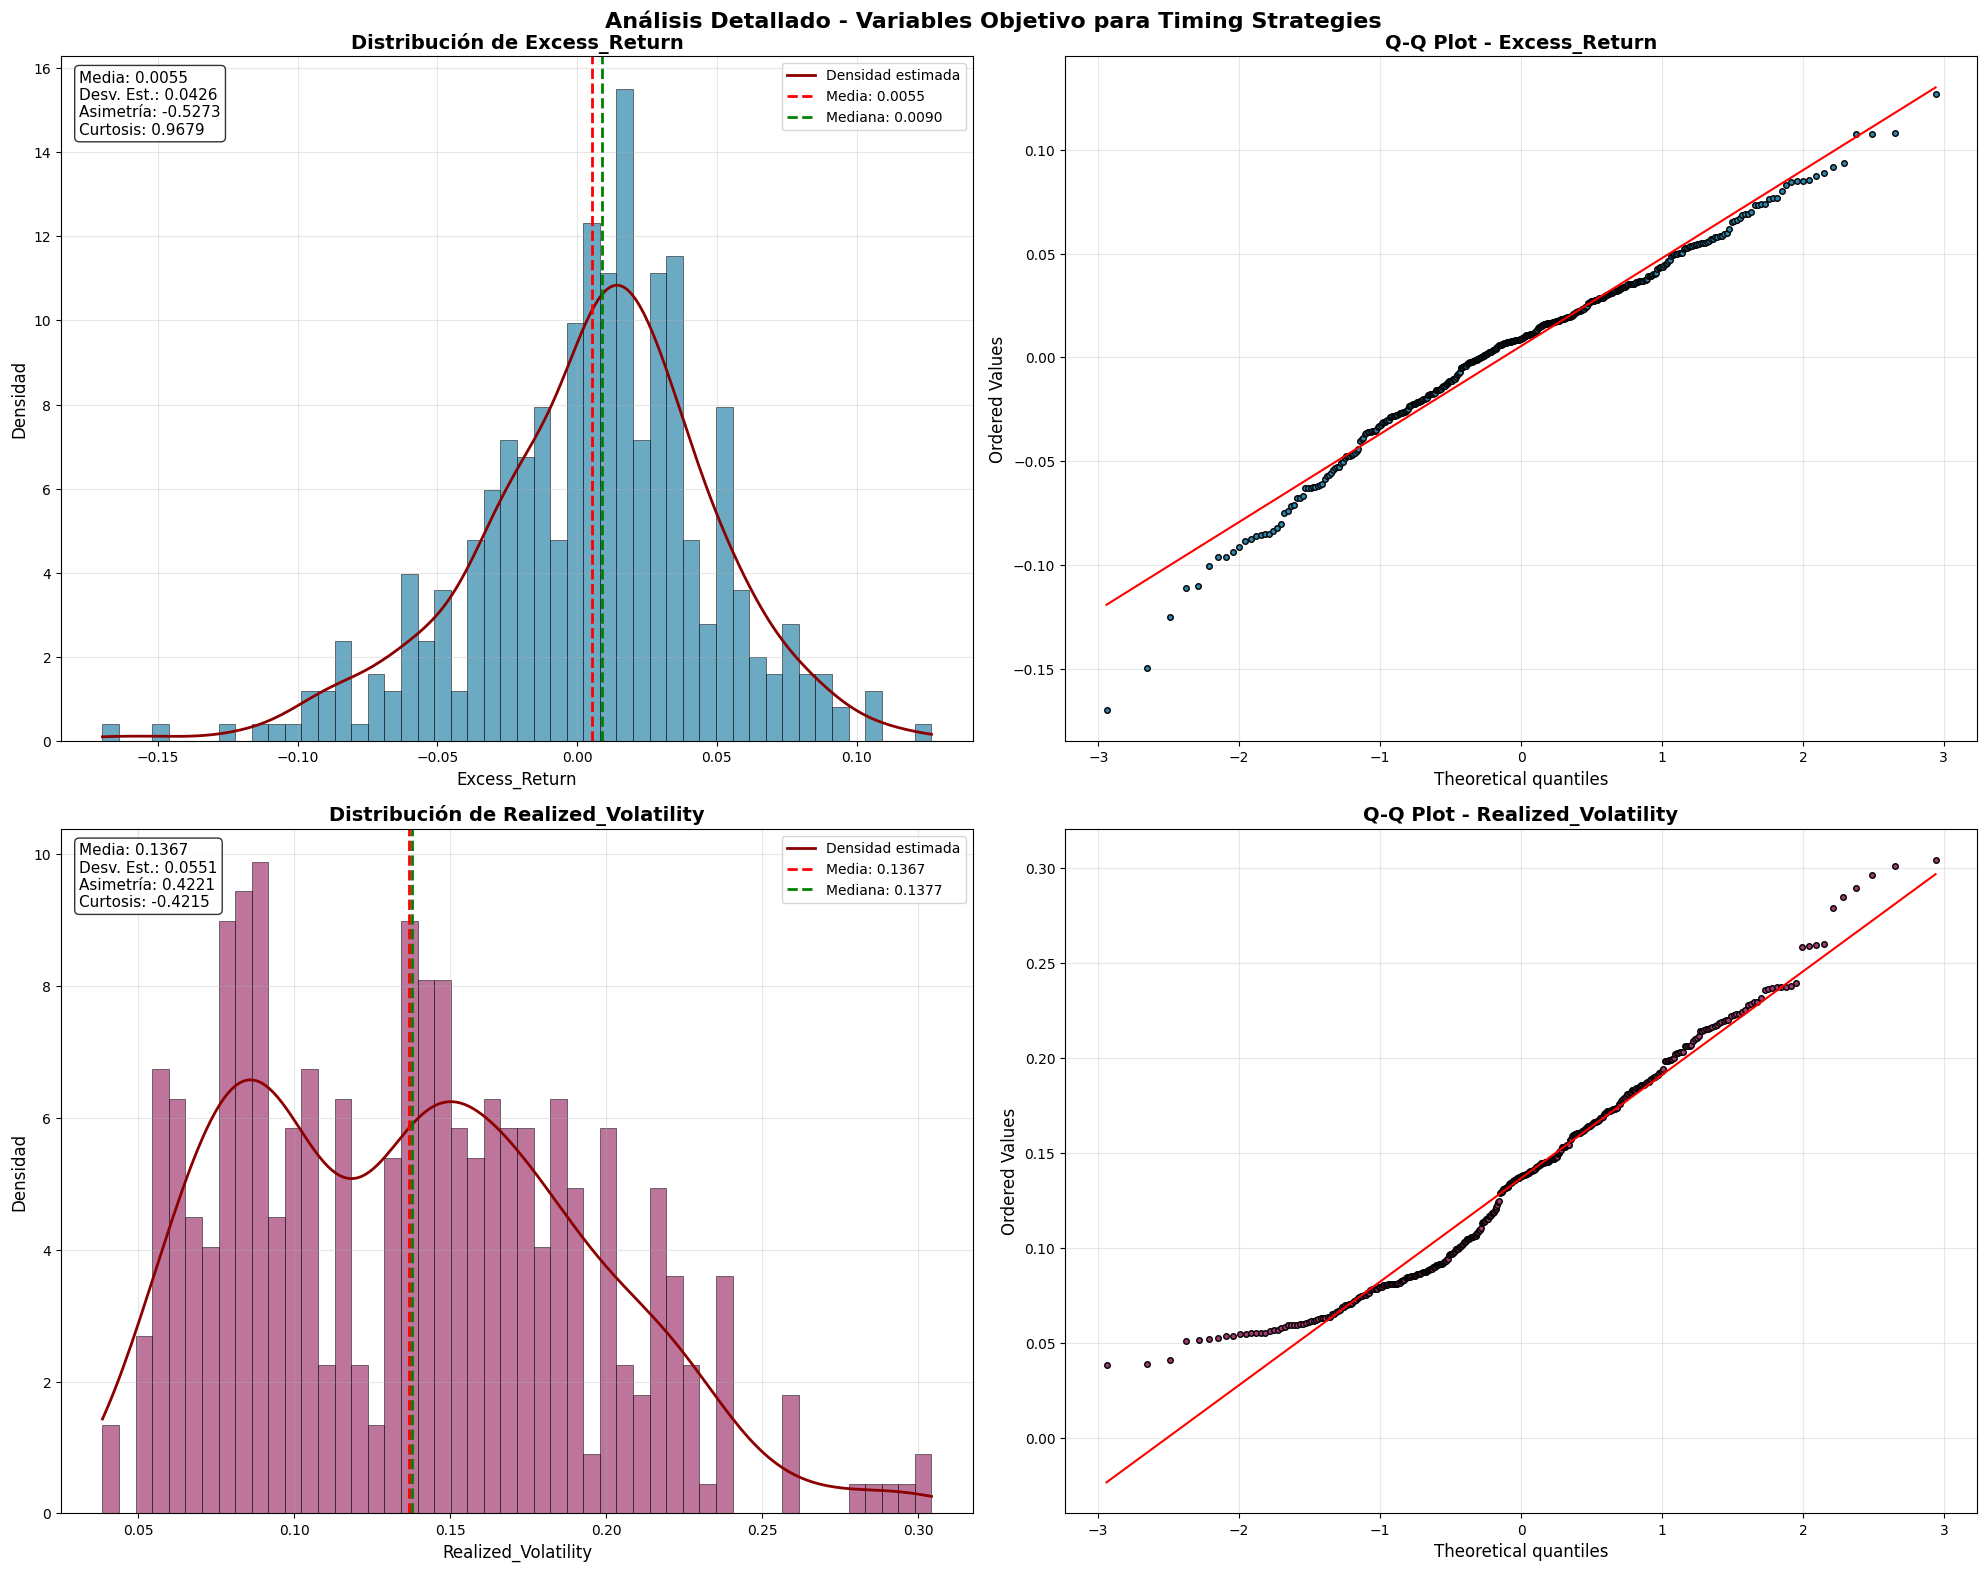


PRIORIDAD 2: ANÁLISIS DE TOP PREDICTORES
ANÁLISIS FOCALIZADO - TOP 12 PREDICTORES
------------------------------------------------------------
Top predictores identificados:
   1. Realized_Vol_12M              : 0.5156
   2. SP500_Returns                 : 0.5127
   3. Momentum_1M                   : 0.5127
   4. VIX                           : 0.5024
   5. Realized_Vol_6M               : 0.4064
   6. VIX_MA_20                     : 0.3932
   7. Price_vs_MA_24M               : 0.3661
   8. Price_vs_MA_6M                : 0.3611
   9. Price_vs_MA_12M               : 0.3482
  10. Momentum_12M                  : 0.3391
  11. Vol_Lag3                      : 0.3145
  12. Vol_Lag2                      : 0.3123


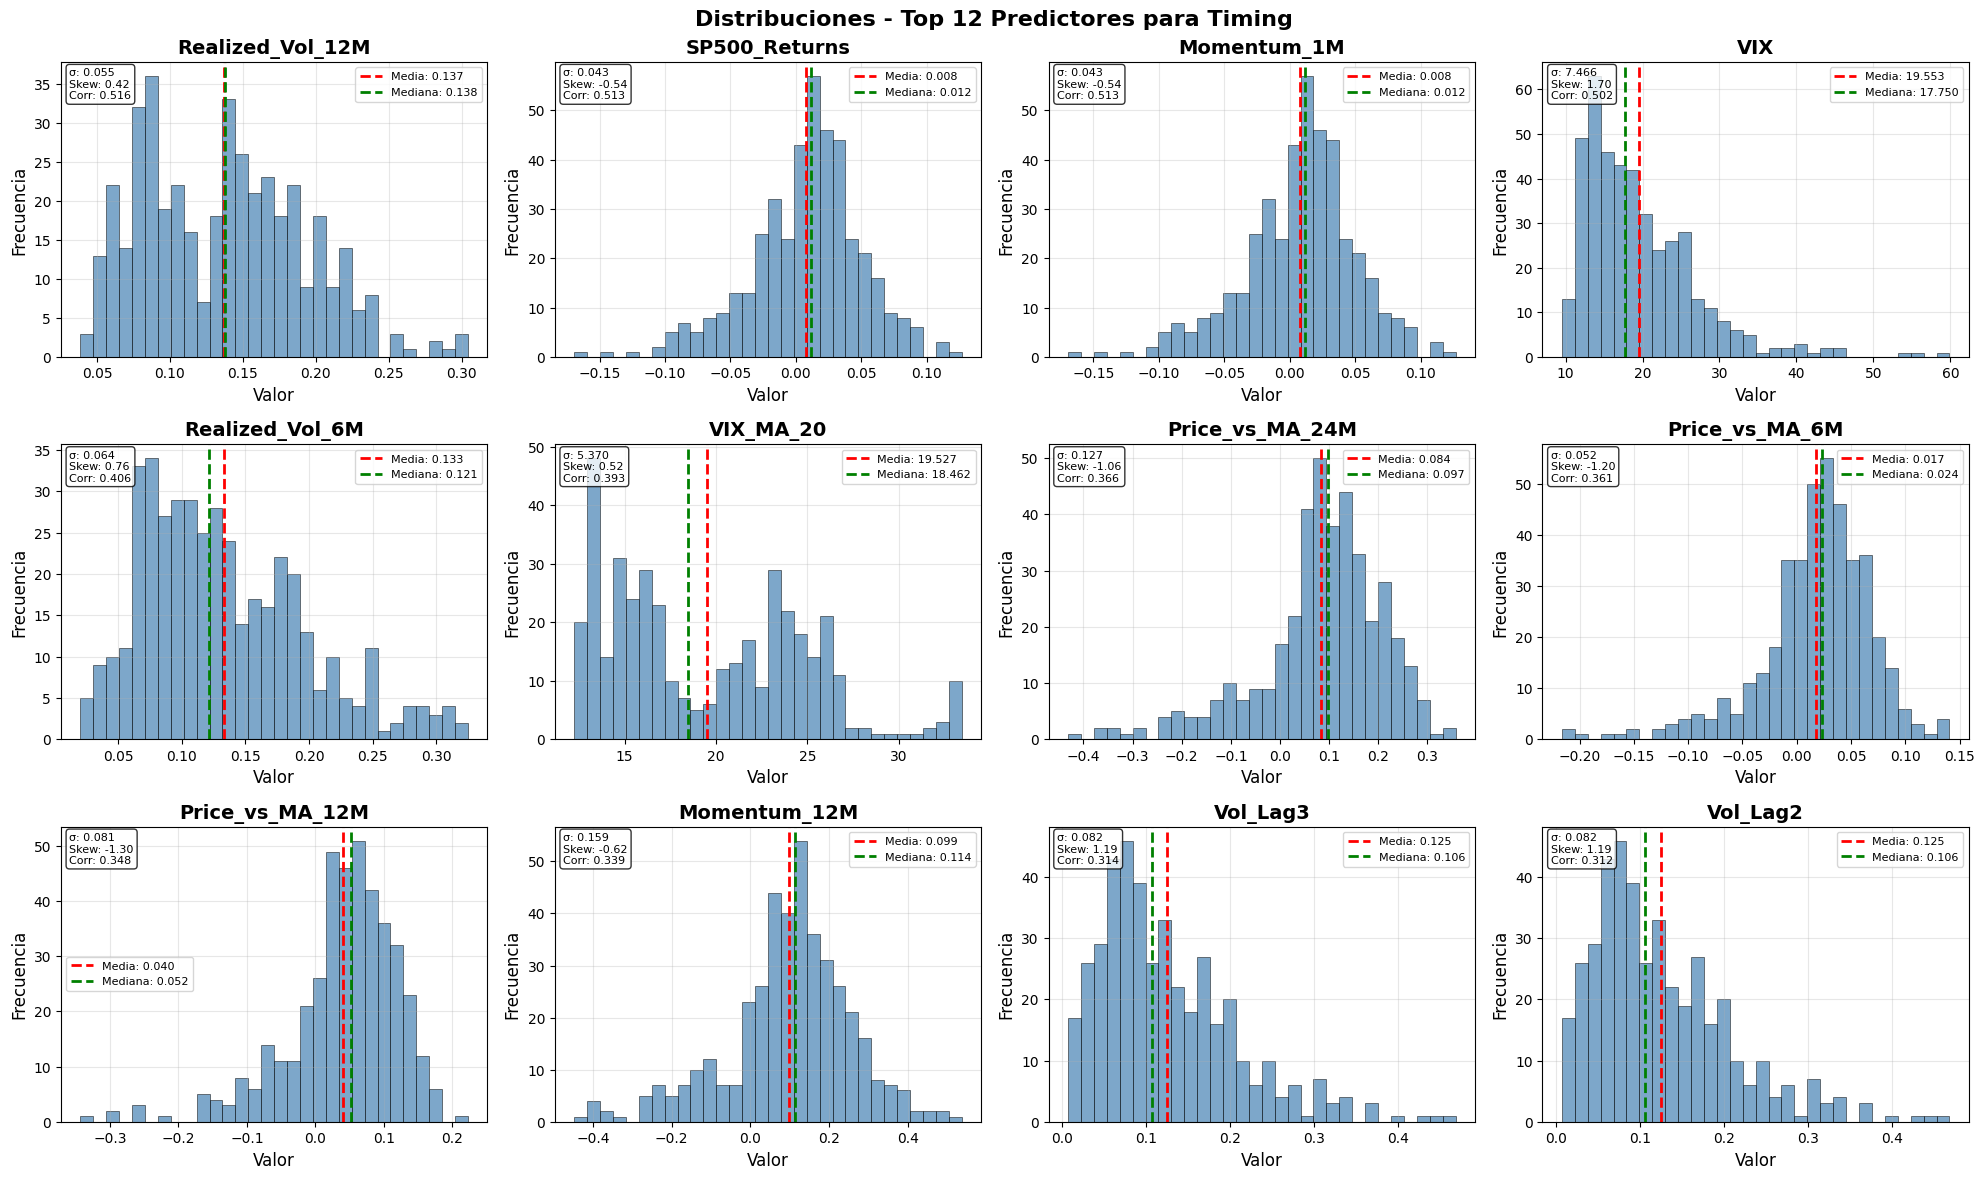


PRIORIDAD 3: POTENCIAL PREDICTIVO ENFOCADO
MATRIZ DE CORRELACIÓN ENFOCADA
------------------------------------------------------------

TOP CORRELACIONES CON EXCESS_RETURN:
--------------------------------------------------
 1. SP500_Returns                 : +0.9990
 2. Momentum_1M                   : +0.9990
 3. Price_vs_MA_6M                : +0.6607
 4. Price_vs_MA_12M               : +0.4765
 5. VIX                           : -0.3849
 6. Price_vs_MA_24M               : +0.3381
 7. Momentum_12M                  : +0.2902
 8. Vol_Lag3                      : +0.0331
 9. Vol_Lag2                      : +0.0326
10. Realized_Vol_12M              : +0.0312
11. Realized_Vol_6M               : +0.0261
12. VIX_MA_20                     : +0.0044

TOP CORRELACIONES CON REALIZED_VOLATILITY:
--------------------------------------------------
 1. Realized_Vol_12M              : +1.0000
 2. Realized_Vol_6M               : +0.7867
 3. VIX_MA_20                     : +0.7819
 4. VIX             

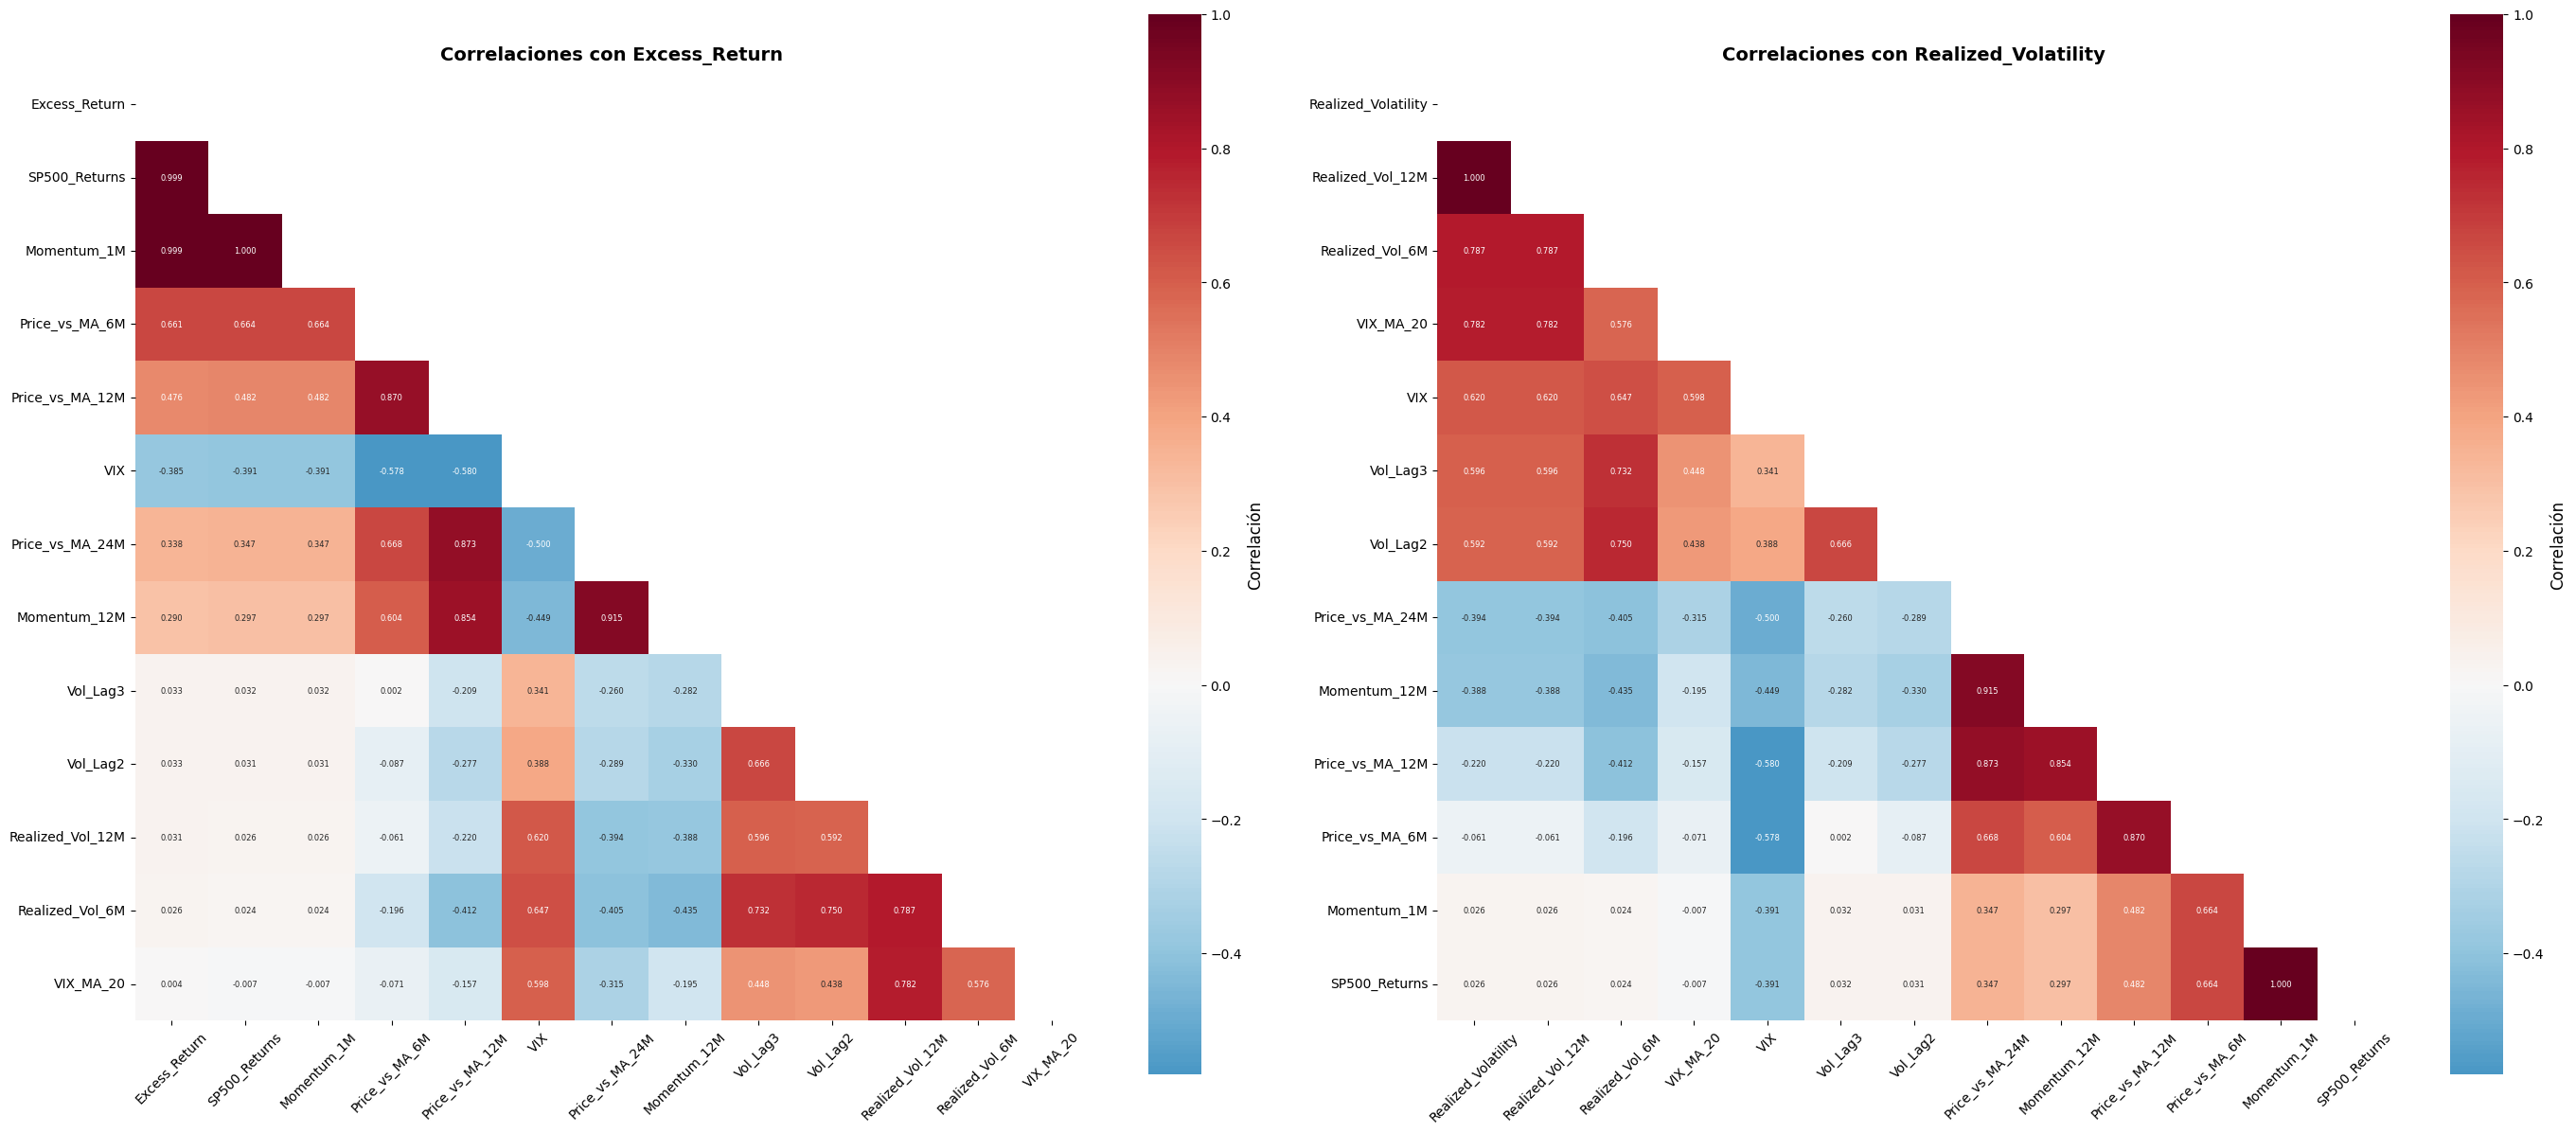


PRIORIDAD 4: VARIABLES CATEGÓRICAS
ANÁLISIS DE VARIABLES CATEGÓRICAS
------------------------------------------------------------
Variables categóricas identificadas: 1

Variable: VIX_Regime
Conteo de estados:
  0: 267 (62.8%)
  1: 158 (37.2%)


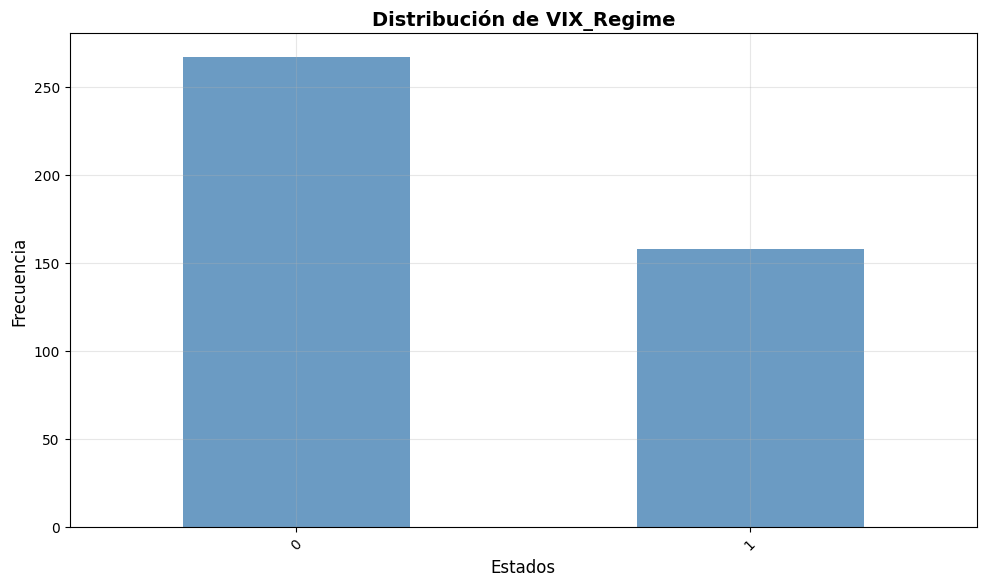


PRIORIDAD 5: ESTADÍSTICAS DESCRIPTIVAS COMPLETAS
ANÁLISIS DESCRIPTIVO DETALLADO DE TODAS LAS VARIABLES
------------------------------------------------------------
Estadísticas descriptivas generadas para 47 variables

PRIORIDAD 6: ANÁLISIS DE CALIDAD DE DATOS
ANÁLISIS DE PATRONES DE MISSING VALUES
------------------------------------------------------------
Resumen general:
  Total celdas: 19,975
  Celdas faltantes: 175
  Porcentaje faltante: 0.88%

Variables con missing values (30 de 47):
----------------------------------------------------------------------
MA_24M                             :   23 (  5.4%) - Max consecutivos: 23
Price_vs_MA_24M                    :   23 (  5.4%) - Max consecutivos: 23
VIX_MA_20                          :   19 (  4.5%) - Max consecutivos: 19
Momentum_12M                       :   12 (  2.8%) - Max consecutivos: 12
Earnings_Yield_Approx              :   12 (  2.8%) - Max consecutivos: 12
MA_12M                             :   11 (  2.6%) - Max conse

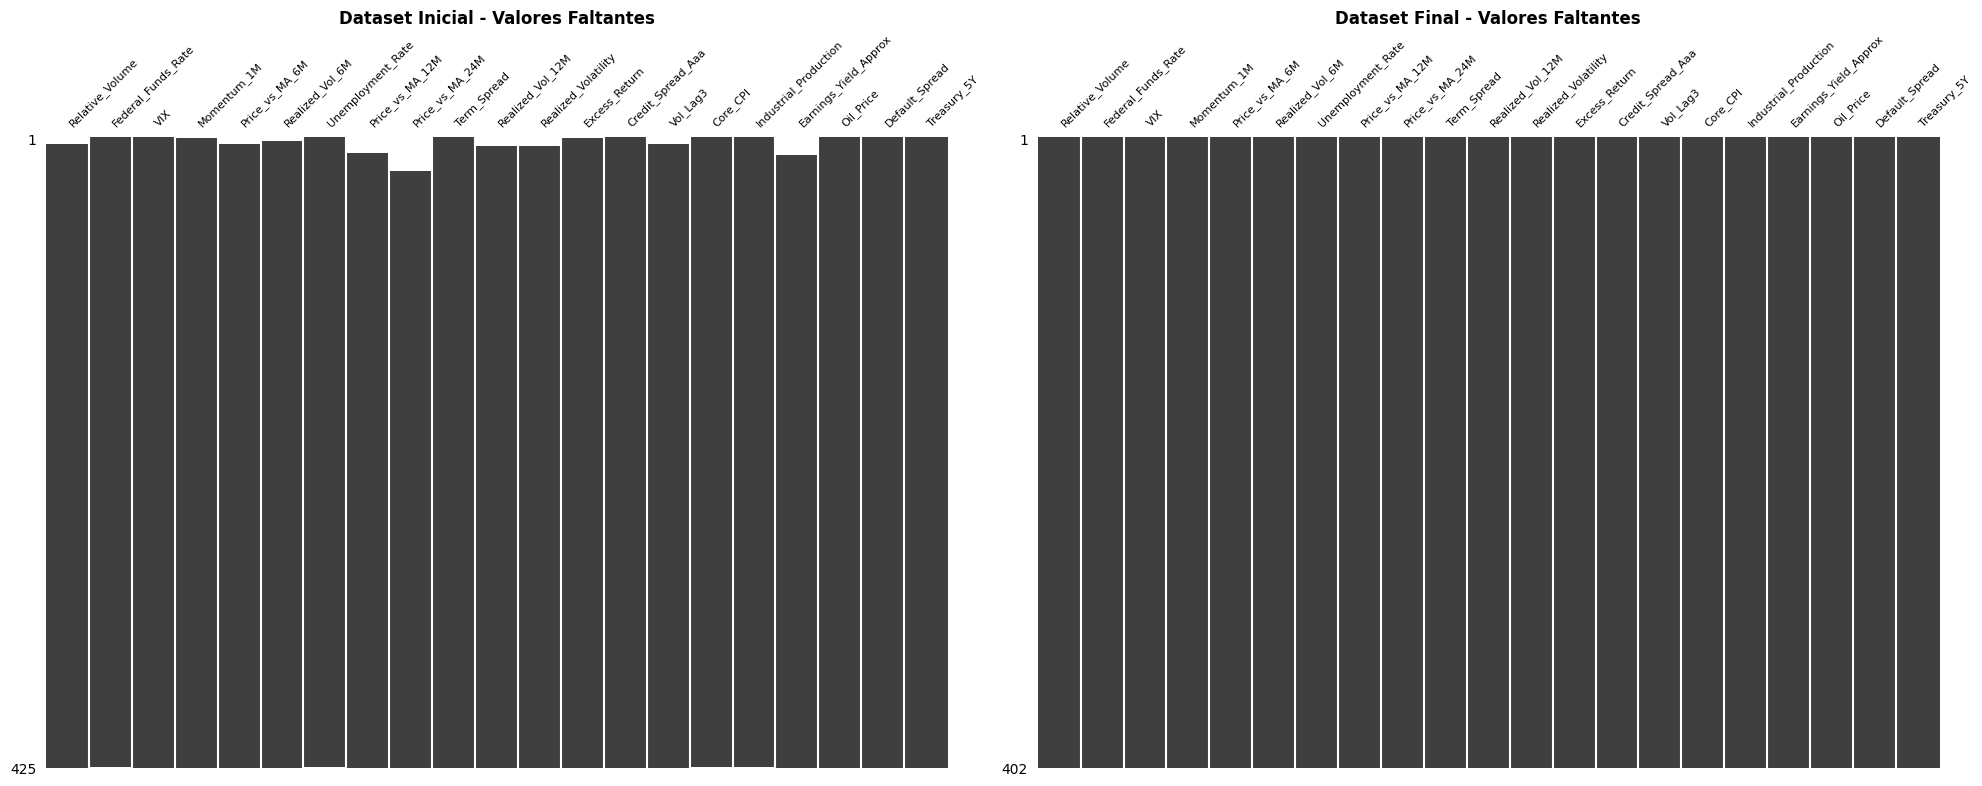


LISTADO FINAL DE VARIABLES SELECCIONADAS
VARIABLES OBJETIVO (2):
----------------------------------------
  1. Excess_Return
  2. Realized_Volatility

VARIABLES EXPLICATIVAS (19):
----------------------------------------

Señales de Momentum (4 variables):
   1. Momentum_1M                         (Score: 1.535, Corr: 0.513)
   2. Price_vs_MA_6M                      (Score: 1.070, Corr: 0.361)
   3. Price_vs_MA_24M                     (Score: 1.039, Corr: 0.366)
   4. Price_vs_MA_12M                     (Score: 1.018, Corr: 0.348)

Régimen de Volatilidad (4 variables):
   5. Realized_Vol_12M                    (Score: 1.423, Corr: 0.516)
   6. VIX                                 (Score: 1.407, Corr: 0.502)
   7. Realized_Vol_6M                     (Score: 1.130, Corr: 0.406)
   8. Vol_Lag3                            (Score: 0.870, Corr: 0.314)

Estrés Crediticio (3 variables):
   9. Default_Spread                      (Score: 0.853, Corr: 0.305)
  10. Credit_Spread_Aaa                

In [ ]:
# =============================================================================
# ANÁLISIS EXPLORATORIO DE DATOS (EDA) - TIMING STRATEGIES
# Análisis descriptivo completo y preparación del dataset para machine learning
# Enfoque: Variables para implementar estrategias reward-risk timing
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import jarque_bera, shapiro, anderson
import warnings
from typing import Dict, List, Tuple, Optional, Union
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

print("="*80)
print("ANÁLISIS EXPLORATORIO DE DATOS - TIMING STRATEGIES")
print("Enfoque: Variables para implementar estrategias reward-risk timing")
print("Objetivo: Selección de 15-25 variables finales para modelado")
print("="*80)

# =============================================================================
# FUNCIONES DE CARGA Y PREPARACIÓN DE DATOS
# =============================================================================

def evaluar_cobertura_temporal_variables(df: pd.DataFrame, fecha_objetivo: str = '1990-01-01') -> pd.DataFrame:
    """Evalúa la cobertura temporal de cada variable desde una fecha objetivo."""
    fecha_obj = pd.to_datetime(fecha_objetivo)
    cobertura_info = []

    for col in df.columns:
        series = df[col].dropna()
        if len(series) == 0:
            continue

        fecha_inicio = series.index.min()
        fecha_fin = series.index.max()

        # Calcular métricas de cobertura
        datos_desde_objetivo = series[series.index >= fecha_obj]
        cobertura_desde_objetivo = len(datos_desde_objetivo)
        cobertura_porcentaje = len(datos_desde_objetivo) / len(df[df.index >= fecha_obj]) * 100

        # Puntuación de cobertura (combina inicio temprano + completitud)
        years_desde_objetivo = max(0, (fecha_inicio.year - fecha_obj.year))
        penalizacion_inicio = max(0, years_desde_objetivo * 2)
        puntuacion_cobertura = cobertura_porcentaje - penalizacion_inicio

        cobertura_info.append({
            'variable': col,
            'fecha_inicio': fecha_inicio,
            'fecha_fin': fecha_fin,
            'cobertura_desde_1990': cobertura_desde_objetivo,
            'cobertura_porcentaje': cobertura_porcentaje,
            'years_desde_objetivo': years_desde_objetivo,
            'puntuacion_cobertura': max(0, puntuacion_cobertura),
            'es_prioritaria': puntuacion_cobertura >= 80
        })

    return pd.DataFrame(cobertura_info).sort_values('puntuacion_cobertura', ascending=False)

def crear_dataset_optimizado_1990():
    """Crea dataset optimizado priorizando cobertura desde 1990."""
    print("CREANDO DATASET OPTIMIZADO PARA TIMING STRATEGIES")
    print("="*70)

    # Variables con excelente cobertura histórica desde FRED
    variables_historicas_prioritarias = {
        # Tasas básicas disponibles desde 1960s-1980s
        'DGS3MO': 'Treasury_3M',
        'DGS6MO': 'Treasury_6M',
        'DGS1': 'Treasury_1Y',
        'DGS5': 'Treasury_5Y',
        'DGS10': 'Treasury_10Y',
        'DGS30': 'Treasury_30Y',

        # Política monetaria
        'FEDFUNDS': 'Federal_Funds_Rate',

        # Inflación con excelente historia
        'CPIAUCSL': 'CPI_All_Urban',
        'CPILFESL': 'Core_CPI',

        # Actividad económica
        'INDPRO': 'Industrial_Production',
        'UNRATE': 'Unemployment_Rate',
        'PAYEMS': 'Total_Payrolls',

        # Mercado básico
        'VIXCLS': 'VIX',

        # Spreads crediticios
        'BAA10Y': 'Credit_Spread_Baa',
        'AAA10Y': 'Credit_Spread_Aaa',

        # Commodities básicos
        'DCOILWTICO': 'Oil_Price',
        'GOLDAMGBD228NLBM': 'Gold_Price',

        # Agregados monetarios
        'M1SL': 'M1_Money_Supply',
        'M2SL': 'M2_Money_Supply',
    }

    print("1. DESCARGANDO VARIABLES CON MÁXIMA COBERTURA HISTÓRICA")
    print("-" * 60)

    macro_data_historico = {}
    start_date = '1990-01-01'

    try:
        import pandas_datareader.data as web

        for fred_code, var_name in variables_historicas_prioritarias.items():
            try:
                series = web.DataReader(fred_code, 'fred', start_date)
                if not series.empty:
                    macro_data_historico[var_name] = series.iloc[:, 0]
                    fecha_inicio = series.index.min()
                    print(f"Descargado {var_name:<25}: {len(series):>4} obs desde {fecha_inicio.strftime('%Y-%m')}")
                else:
                    print(f"Sin datos {var_name:<25}")
            except Exception as e:
                print(f"Error {var_name:<25}: {str(e)[:50]}")

    except ImportError:
        print("Warning: pandas_datareader no disponible")
        return None, None, None

    # Datos básicos del mercado
    print("\n2. DESCARGANDO DATOS BÁSICOS DEL MERCADO")
    print("-" * 60)

    import yfinance as yf

    mercado_data = {}

    # S&P 500
    try:
        sp500 = yf.download('^GSPC', start=start_date, progress=False)
        if not sp500.empty:
            if isinstance(sp500.columns, pd.MultiIndex):
                sp500.columns = sp500.columns.droplevel(1)
            mercado_data['SP500_Close'] = sp500['Close']
            mercado_data['SP500_Volume'] = sp500['Volume']
            print(f"S&P 500: {len(sp500)} observaciones desde {sp500.index.min().strftime('%Y-%m')}")
    except Exception as e:
        print(f"Error con S&P 500: {str(e)}")

    # VIX desde Yahoo Finance como backup
    try:
        vix = yf.download('^VIX', start=start_date, progress=False)
        if not vix.empty:
            if isinstance(vix.columns, pd.MultiIndex):
                vix.columns = vix.columns.droplevel(1)
            if 'VIX' not in macro_data_historico:
                mercado_data['VIX'] = vix['Close']
                print(f"VIX (Yahoo): {len(vix)} observaciones")
    except Exception as e:
        print(f"Error con VIX: {str(e)}")

    # Construcción de variables fundamentales básicas
    print("\n3. CALCULANDO VARIABLES FUNDAMENTALES BÁSICAS")
    print("-" * 60)

    # Crear DataFrame base mensual
    if 'SP500_Close' in mercado_data:
        df_monthly = mercado_data['SP500_Close'].resample('M').last().to_frame('SP500_Close')

        # Agregar otras variables de mercado
        for var, data in mercado_data.items():
            if var != 'SP500_Close':
                df_monthly[var] = data.resample('M').last()

        # Agregar variables macroeconómicas
        for var, data in macro_data_historico.items():
            df_monthly[var] = data.resample('M').last()

        print(f"DataFrame base: {len(df_monthly)} observaciones desde {df_monthly.index.min().strftime('%Y-%m')}")

        # Calcular variables derivadas
        print("\n4. CALCULANDO VARIABLES DERIVADAS PARA TIMING")
        print("-" * 60)

        # Returns y Excess Returns
        df_monthly['SP500_Returns'] = df_monthly['SP500_Close'].pct_change()

        # Tasa libre de riesgo
        risk_free_sources = ['Treasury_3M', 'Federal_Funds_Rate']
        for source in risk_free_sources:
            if source in df_monthly.columns:
                df_monthly['Risk_Free_Rate'] = df_monthly[source] / 100 / 12  # Convertir a mensual
                print(f"Tasa libre de riesgo desde: {source}")
                break

        if 'Risk_Free_Rate' not in df_monthly.columns:
            df_monthly['Risk_Free_Rate'] = 0.02 / 12  # 2% anual fijo
            print("Tasa libre de riesgo: 2% fijo")

        # Variable objetivo principal
        df_monthly['Excess_Return'] = df_monthly['SP500_Returns'] - df_monthly['Risk_Free_Rate']

        # Volatilidad realizada
        for window in [3, 6, 12]:
            vol_col = f'Realized_Vol_{window}M'
            df_monthly[vol_col] = df_monthly['SP500_Returns'].rolling(
                window=window, min_periods=max(2, window//2)
            ).std() * np.sqrt(12)

        df_monthly['Realized_Volatility'] = df_monthly['Realized_Vol_12M']

        # Term Spread
        if 'Treasury_10Y' in df_monthly.columns and 'Treasury_3M' in df_monthly.columns:
            df_monthly['Term_Spread'] = df_monthly['Treasury_10Y'] - df_monthly['Treasury_3M']
            print("Term Spread calculado")

        # Default Spread
        if 'Credit_Spread_Baa' in df_monthly.columns:
            df_monthly['Default_Spread'] = df_monthly['Credit_Spread_Baa']
            print("Default Spread disponible")

        # Variables de momentum para timing (múltiples horizontes)
        for months in [1, 3, 6, 12]:
            momentum_col = f'Momentum_{months}M'
            df_monthly[momentum_col] = df_monthly['SP500_Close'].pct_change(months)

        # Variables técnicas adicionales para timing
        for window in [6, 12, 24]:
            ma_col = f'MA_{window}M'
            df_monthly[ma_col] = df_monthly['SP500_Close'].rolling(window).mean()
            df_monthly[f'Price_vs_MA_{window}M'] = df_monthly['SP500_Close'] / df_monthly[ma_col] - 1

        # Variables de volatilidad con lags
        vol_short = df_monthly['SP500_Returns'].rolling(window=3, min_periods=2).std() * np.sqrt(12)
        for lag in [1, 2, 3]:
            df_monthly[f'Vol_Lag{lag}'] = vol_short.shift(lag)

        # Variables de régimen de volatilidad
        if 'VIX' in df_monthly.columns:
            df_monthly['VIX_MA_20'] = df_monthly['VIX'].rolling(20).mean()
            df_monthly['VIX_Regime'] = (df_monthly['VIX'] > df_monthly['VIX_MA_20']).astype(int)
            df_monthly['VIX_Percentile'] = df_monthly['VIX'].rolling(252).rank(pct=True)

        # Aproximaciones de variables fundamentales
        if 'Treasury_10Y' in df_monthly.columns:
            df_monthly['Dividend_Yield_Approx'] = 2.5 + (df_monthly['Treasury_10Y'] - 5) * 0.3
            df_monthly['Dividend_Yield_Approx'] = df_monthly['Dividend_Yield_Approx'].clip(1.0, 6.0)
            print("Dividend Yield aproximado")

        if 'Industrial_Production' in df_monthly.columns:
            ip_growth = df_monthly['Industrial_Production'].pct_change(12)
            df_monthly['Earnings_Yield_Approx'] = 0.06 + ip_growth * 0.5
            df_monthly['Earnings_Yield_Approx'] = df_monthly['Earnings_Yield_Approx'].clip(0.02, 0.15)
            print("Earnings Yield aproximado")

        # Variables de volumen y estructura de mercado
        if 'SP500_Volume' in df_monthly.columns:
            vol_ma = df_monthly['SP500_Volume'].rolling(window=12, min_periods=6).mean()
            df_monthly['Relative_Volume'] = df_monthly['SP500_Volume'] / vol_ma
            print("Relative Volume calculado")

        print(f"\nDataset optimizado creado: {df_monthly.shape}")

    else:
        print("Error: No se pudo crear dataset base - S&P 500 no disponible")
        return None, None, None

    # Evaluar cobertura final
    cobertura_reporte = evaluar_cobertura_temporal_variables(df_monthly, '1990-01-01')

    # Filtrar variables con buena cobertura
    variables_prioritarias = cobertura_reporte[
        cobertura_reporte['puntuacion_cobertura'] >= 60
    ]['variable'].tolist()

    # Asegurar que las variables objetivo estén incluidas
    target_vars = ['Excess_Return', 'Realized_Volatility']
    for target in target_vars:
        if target not in variables_prioritarias and target in df_monthly.columns:
            variables_prioritarias.insert(0, target)

    df_optimizado = df_monthly[variables_prioritarias].copy()

    print(f"\n5. FILTRADO POR COBERTURA TEMPORAL")
    print("-" * 60)
    print(f"Variables con buena cobertura (>=60%): {len(variables_prioritarias)}")
    print(f"Período final: {df_optimizado.index.min()} a {df_optimizado.index.max()}")
    print(f"Observaciones finales: {len(df_optimizado)}")

    return df_optimizado, variables_prioritarias, cobertura_reporte

def cargar_datos_preprocesados():
    """Carga el dataset optimizado para timing strategies."""
    print("CARGANDO DATOS OPTIMIZADOS PARA TIMING STRATEGIES")
    print("-" * 60)

    # Crear dataset optimizado
    df, variables_prioritarias, cobertura_reporte = crear_dataset_optimizado_1990()

    if df is None:
        raise ValueError("No se pudo crear dataset optimizado")

    # Convertir índice a datetime si es string
    if df.index.dtype == 'object':
        df.index = pd.to_datetime(df.index)

    # Definir variables objetivo
    target_vars = ['Excess_Return', 'Realized_Volatility']

    # Variables explicativas son las prioritarias menos las objetivo
    feature_vars = [col for col in variables_prioritarias if col not in target_vars]

    # Validaciones y reporte
    print(f"Dataset optimizado cargado: {df.shape[0]} observaciones × {df.shape[1]} variables")
    print(f"Período: {df.index.min().strftime('%Y-%m-%d')} a {df.index.max().strftime('%Y-%m-%d')}")
    print(f"Variables objetivo: {len(target_vars)}")
    print(f"Variables explicativas: {len(feature_vars)}")

    # Mostrar reporte de cobertura
    print(f"\nREPORTE DE COBERTURA TEMPORAL:")
    print("-" * 60)
    for _, row in cobertura_reporte.head(15).iterrows():
        status = "ALTA" if row['es_prioritaria'] else "MEDIA"
        print(f"{status} {row['variable']:<25}: {row['cobertura_porcentaje']:>5.1f}% desde {row['fecha_inicio'].strftime('%Y-%m')}")

    if len(cobertura_reporte) > 15:
        print(f"   ... y {len(cobertura_reporte) - 15} variables más")

    return df, target_vars, feature_vars

# =============================================================================
# ANÁLISIS DESCRIPTIVO DETALLADO
# =============================================================================

def generar_estadisticas_descriptivas_detalladas(df: pd.DataFrame) -> pd.DataFrame:
    """Genera estadísticas descriptivas comprehensivas de todas las variables."""
    print("ANÁLISIS DESCRIPTIVO DETALLADO DE TODAS LAS VARIABLES")
    print("-" * 60)

    # Estadísticas básicas extendidas
    stats_df = df.describe().T

    # Estadísticas adicionales
    stats_df['Missing_Count'] = df.isnull().sum()
    stats_df['Missing_Pct'] = (df.isnull().sum() / len(df)) * 100
    stats_df['Skewness'] = df.skew()
    stats_df['Kurtosis'] = df.kurtosis()

    # Rango y coeficiente de variación
    stats_df['Range'] = stats_df['max'] - stats_df['min']
    stats_df['CV'] = (stats_df['std'] / stats_df['mean']).abs()

    # Percentiles adicionales
    stats_df['P5'] = df.quantile(0.05)
    stats_df['P95'] = df.quantile(0.95)
    stats_df['IQR'] = stats_df['75%'] - stats_df['25%']

    # Pruebas de normalidad
    def test_normalidad_basico(series):
        valid_data = series.dropna()
        if len(valid_data) < 20:
            return np.nan, np.nan
        try:
            # Jarque-Bera test
            jb_stat, jb_p = jarque_bera(valid_data)
            return jb_stat, jb_p
        except:
            return np.nan, np.nan

    normalidad_results = df.apply(test_normalidad_basico)
    stats_df['JB_Statistic'] = [result[0] if isinstance(result, tuple) else np.nan for result in normalidad_results]
    stats_df['JB_P_Value'] = [result[1] if isinstance(result, tuple) else np.nan for result in normalidad_results]
    stats_df['Is_Normal_JB'] = stats_df['JB_P_Value'] > 0.05

    # Reordenar columnas
    columns_order = ['count', 'mean', 'std', 'min', 'P5', '25%', '50%', '75%', 'P95', 'max',
                    'Range', 'IQR', 'CV', 'Missing_Count', 'Missing_Pct', 'Skewness', 'Kurtosis',
                    'JB_Statistic', 'JB_P_Value', 'Is_Normal_JB']

    stats_df = stats_df[columns_order]

    print(f"Estadísticas descriptivas generadas para {len(stats_df)} variables")

    return stats_df

# =============================================================================
# ANÁLISIS ORGANIZADO POR PRIORIDADES
# =============================================================================

def analizar_variables_objetivo_profundo(df: pd.DataFrame, target_vars: List[str]):
    """Análisis profundo de variables objetivo para timing strategies."""
    print("ANÁLISIS PROFUNDO - VARIABLES OBJETIVO")
    print("-" * 60)

    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    fig.suptitle('Análisis Detallado - Variables Objetivo para Timing Strategies', fontsize=16, fontweight='bold')

    colors = ['#2E86AB', '#A23B72']

    for i, var in enumerate(target_vars):
        if var not in df.columns:
            continue

        data = df[var].dropna()

        if len(data) == 0:
            continue

        # Histograma con curva de densidad
        axes[i, 0].hist(data, bins=50, density=True, alpha=0.7, color=colors[i],
                       edgecolor='black', linewidth=0.5)

        # Agregar curva de densidad estimada
        from scipy.stats import gaussian_kde
        if len(data) > 1:
            density = gaussian_kde(data)
            xs = np.linspace(data.min(), data.max(), 200)
            axes[i, 0].plot(xs, density(xs), color='darkred', linewidth=2, label='Densidad estimada')

        # Líneas de referencia
        mean_val = data.mean()
        median_val = data.median()
        axes[i, 0].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_val:.4f}')
        axes[i, 0].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Mediana: {median_val:.4f}')

        axes[i, 0].set_title(f'Distribución de {var}', fontweight='bold')
        axes[i, 0].set_xlabel(var)
        axes[i, 0].set_ylabel('Densidad')
        axes[i, 0].legend()
        axes[i, 0].grid(True, alpha=0.3)

        # Estadísticas en el gráfico
        std_val = data.std()
        skew_val = stats.skew(data)
        kurt_val = stats.kurtosis(data)

        stats_text = f'Media: {mean_val:.4f}\nDesv. Est.: {std_val:.4f}\nAsimetría: {skew_val:.4f}\nCurtosis: {kurt_val:.4f}'
        axes[i, 0].text(0.02, 0.98, stats_text, transform=axes[i, 0].transAxes,
                       verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

        # Q-Q Plot para normalidad
        stats.probplot(data, dist="norm", plot=axes[i, 1])
        axes[i, 1].set_title(f'Q-Q Plot - {var}', fontweight='bold')
        axes[i, 1].grid(True, alpha=0.3)

        # Personalizar Q-Q plot
        axes[i, 1].get_lines()[0].set_markerfacecolor(colors[i])
        axes[i, 1].get_lines()[0].set_markeredgecolor('black')
        axes[i, 1].get_lines()[0].set_markersize(4)

    plt.tight_layout()
    plt.show()

def analizar_predictores_principales(df: pd.DataFrame, target_vars: List[str], top_n: int = 12):
    """Análisis focalizado en principales predictores."""
    print(f"ANÁLISIS FOCALIZADO - TOP {top_n} PREDICTORES")
    print("-" * 60)

    # Identificar top predictores
    feature_vars = [col for col in df.columns if col not in target_vars]

    # Calcular correlaciones con ambas variables objetivo
    correlations = {}
    for feature in feature_vars:
        if feature in df.columns:
            corr_scores = []
            for target in target_vars:
                if target in df.columns:
                    corr = abs(df[feature].corr(df[target]))
                    if not np.isnan(corr):
                        corr_scores.append(corr)
            if corr_scores:
                correlations[feature] = np.mean(corr_scores)

    # Seleccionar top predictores
    top_predictors = sorted(correlations.items(), key=lambda x: x[1], reverse=True)[:top_n]
    top_predictor_names = [name for name, score in top_predictors]

    print("Top predictores identificados:")
    for i, (name, score) in enumerate(top_predictors, 1):
        print(f"  {i:2d}. {name:<30}: {score:.4f}")

    # Visualizar distribuciones de top predictores
    n_vars = len(top_predictor_names)
    n_cols = 4
    n_rows = (n_vars + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4*n_rows))
    fig.suptitle(f'Distribuciones - Top {top_n} Predictores para Timing', fontsize=16, fontweight='bold')

    if n_vars == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes if hasattr(axes, '__len__') else [axes]
    else:
        axes = axes.flatten()

    for i, var in enumerate(top_predictor_names):
        data = df[var].dropna()

        if len(data) == 0:
            axes[i].text(0.5, 0.5, 'Sin datos', transform=axes[i].transAxes,
                       ha='center', va='center')
            axes[i].set_title(var)
            continue

        # Histograma con estadísticas
        axes[i].hist(data, bins=min(30, len(data)//5), alpha=0.7, color='steelblue',
                    edgecolor='black', linewidth=0.5)

        # Estadísticas de tendencia central
        mean_val = data.mean()
        median_val = data.median()

        axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2,
                      label=f'Media: {mean_val:.3f}')
        axes[i].axvline(median_val, color='green', linestyle='--', linewidth=2,
                      label=f'Mediana: {median_val:.3f}')

        axes[i].set_title(var, fontweight='bold')
        axes[i].set_xlabel('Valor')
        axes[i].set_ylabel('Frecuencia')
        axes[i].legend(fontsize=8)
        axes[i].grid(True, alpha=0.3)

        # Texto con estadísticas adicionales
        std_val = data.std()
        skew_val = stats.skew(data)
        corr_score = correlations.get(var, 0)
        stats_text = f'σ: {std_val:.3f}\nSkew: {skew_val:.2f}\nCorr: {corr_score:.3f}'
        axes[i].text(0.02, 0.98, stats_text, transform=axes[i].transAxes,
                    verticalalignment='top', fontsize=8,
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # Ocultar subplots vacíos
    for i in range(len(top_predictor_names), len(axes)):
        if i < len(axes):
            axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()

    return top_predictor_names

def generar_matriz_correlacion_enfocada(df: pd.DataFrame, target_vars: List[str], top_predictors: List[str]):
    """Matriz de correlación enfocada en variables clave."""
    print("MATRIZ DE CORRELACIÓN ENFOCADA")
    print("-" * 60)

    # Seleccionar variables para análisis
    relevant_vars = target_vars + top_predictors

    # Calcular matriz de correlación
    corr_matrix = df[relevant_vars].corr()

    # Extraer correlaciones con variables objetivo
    target_correlations = {}

    for target in target_vars:
        if target not in corr_matrix.columns:
            continue

        correlations = corr_matrix[target].drop([t for t in target_vars if t in corr_matrix.columns]).abs().sort_values(ascending=False)
        target_correlations[target] = correlations

        print(f"\nTOP CORRELACIONES CON {target.upper()}:")
        print("-" * 50)
        for i, (var, corr) in enumerate(correlations.head(12).items(), 1):
            direction = "+" if corr_matrix[target][var] > 0 else "-"
            print(f"{i:2d}. {var:<30}: {direction}{corr:.4f}")

    # Visualización de matriz de correlación
    fig, axes = plt.subplots(1, len(target_vars), figsize=(14*len(target_vars), 12))
    if len(target_vars) == 1:
        axes = [axes]

    for i, target in enumerate(target_vars):
        if target not in target_correlations:
            continue

        # Seleccionar variables más correlacionadas
        top_vars = target_correlations[target].head(20).index.tolist()
        relevant_vars_plot = [target] + top_vars

        corr_subset = corr_matrix.loc[relevant_vars_plot, relevant_vars_plot]

        # Crear heatmap
        mask = np.triu(np.ones_like(corr_subset, dtype=bool))
        sns.heatmap(corr_subset, mask=mask, annot=True, cmap='RdBu_r', center=0,
                   square=True, ax=axes[i], cbar_kws={"label": "Correlación"},
                   fmt='.3f', annot_kws={'size': 6})

        axes[i].set_title(f'Correlaciones con {target}', fontweight='bold', fontsize=14)
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].tick_params(axis='y', rotation=0)

    plt.tight_layout()
    plt.show()

    return target_correlations

def analizar_variables_categoricas(df: pd.DataFrame):
    """Análisis de variables categóricas y conteo de estados."""
    print("ANÁLISIS DE VARIABLES CATEGÓRICAS")
    print("-" * 60)

    # Identificar variables categóricas
    categorical_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()

    # En datos financieros, también considerar variables con pocos valores únicos
    potential_categorical = []
    for col in df.select_dtypes(include=[np.number]).columns:
        unique_vals = df[col].nunique()
        if unique_vals <= 10 and unique_vals > 1:
            potential_categorical.append(col)

    all_categorical = categorical_vars + potential_categorical

    if not all_categorical:
        print("No se encontraron variables categóricas en el dataset.")
        print("(Típico en datasets financieros donde las variables son principalmente continuas)")
        return

    print(f"Variables categóricas identificadas: {len(all_categorical)}")

    for var in all_categorical[:5]:  # Limitar a primeras 5
        print(f"\nVariable: {var}")
        value_counts = df[var].value_counts()
        print("Conteo de estados:")
        for state, count in value_counts.items():
            pct = (count / len(df)) * 100
            print(f"  {state}: {count} ({pct:.1f}%)")

        # Visualización si hay pocas categorías
        if len(value_counts) <= 10:
            plt.figure(figsize=(10, 6))
            value_counts.plot(kind='bar', color='steelblue', alpha=0.8)
            plt.title(f'Distribución de {var}', fontweight='bold')
            plt.xlabel('Estados')
            plt.ylabel('Frecuencia')
            plt.xticks(rotation=45)
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()

# =============================================================================
# ANÁLISIS DE MISSING VALUES Y OUTLIERS
# =============================================================================

def analizar_patrones_missing_values(df: pd.DataFrame):
    """Análisis detallado de patrones de valores faltantes."""
    print("ANÁLISIS DE PATRONES DE MISSING VALUES")
    print("-" * 60)

    # Estadísticas generales
    total_cells = df.shape[0] * df.shape[1]
    missing_cells = df.isnull().sum().sum()
    missing_percentage = (missing_cells / total_cells) * 100

    print(f"Resumen general:")
    print(f"  Total celdas: {total_cells:,}")
    print(f"  Celdas faltantes: {missing_cells:,}")
    print(f"  Porcentaje faltante: {missing_percentage:.2f}%")

    # Análisis por variable
    missing_by_var = df.isnull().sum()
    vars_with_missing = missing_by_var[missing_by_var > 0].sort_values(ascending=False)

    missing_analysis = {}

    if len(vars_with_missing) > 0:
        print(f"\nVariables con missing values ({len(vars_with_missing)} de {len(df.columns)}):")
        print("-" * 70)

        for var, count in vars_with_missing.items():
            pct = (count / len(df)) * 100

            # Analizar patrón temporal
            var_series = df[var]

            # Buscar períodos consecutivos de missings
            is_missing = var_series.isnull()
            consecutive_missing = []
            current_streak = 0

            for i, missing in enumerate(is_missing):
                if missing:
                    current_streak += 1
                else:
                    if current_streak > 0:
                        consecutive_missing.append(current_streak)
                    current_streak = 0

            if current_streak > 0:
                consecutive_missing.append(current_streak)

            max_consecutive = max(consecutive_missing) if consecutive_missing else 0

            missing_analysis[var] = {
                'count': count,
                'percentage': pct,
                'max_consecutive': max_consecutive,
                'total_streaks': len(consecutive_missing)
            }

            print(f"{var:<35}: {count:>4} ({pct:>5.1f}%) - Max consecutivos: {max_consecutive}")

    # Visualización de matriz de missings (solo si hay missings significativos)
    if len(vars_with_missing) > 0 and missing_percentage > 1:
        try:
            import missingno as msno

            print(f"\nGenerando visualización de matriz de missing values...")

            # Matriz de missings
            plt.figure(figsize=(15, 8))
            msno.matrix(df, fontsize=10)
            plt.title('Matriz de Valores Faltantes', fontsize=14, fontweight='bold')
            plt.tight_layout()
            plt.show()

            # Gráfico de barras
            plt.figure(figsize=(15, 6))
            msno.bar(df, fontsize=10)
            plt.title('Completitud por Variable', fontsize=14, fontweight='bold')
            plt.tight_layout()
            plt.show()

        except ImportError:
            print("Para visualizar matriz de missings, instalar: pip install missingno")

    else:
        print("\nDataset con excelente completitud")

    return missing_analysis

def detectar_outliers_practico(df: pd.DataFrame, target_vars: List[str]):
    """Detección práctica de outliers con enfoque en variables críticas."""
    print("DETECCIÓN PRÁCTICA DE OUTLIERS")
    print("-" * 60)

    outliers_info = {}

    # Variables críticas para timing strategies
    critical_vars = target_vars + [col for col in df.columns if any(keyword in col.lower()
                      for keyword in ['vix', 'spread', 'momentum', 'volatility', 'term', 'default', 'credit'])]

    print(f"Analizando outliers en {len(critical_vars)} variables críticas para timing...")

    for var in critical_vars:
        if var not in df.columns:
            continue

        data = df[var].dropna()

        if len(data) == 0:
            continue

        # Método robusto: IQR modificado
        Q1, Q3 = data.quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = data[(data < lower_bound) | (data > upper_bound)]

        outliers_info[var] = {
            'count': len(outliers),
            'percentage': len(outliers) / len(data) * 100,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'extreme_values': outliers.sort_values().iloc[[0, -1]] if len(outliers) > 0 else None
        }

        print(f"{var:<30}: {len(outliers):>3} outliers ({len(outliers)/len(data)*100:>4.1f}%)")

    return outliers_info

# =============================================================================
# TRATAMIENTO DE DATOS
# =============================================================================

def aplicar_tratamiento_missings(df: pd.DataFrame, missing_analysis: dict) -> pd.DataFrame:
    """Ejecuta el tratamiento de missing values basado en patrones identificados."""
    print("APLICANDO TRATAMIENTO DE MISSING VALUES")
    print("-" * 60)

    df_clean = df.copy()
    variables_eliminadas = []

    if not missing_analysis:
        print("No hay missing values para tratar")
        return df_clean

    for var, info in missing_analysis.items():
        pct = info['percentage']
        max_consec = info['max_consecutive']

        print(f"\nTratando {var} ({pct:.1f}% missing)...")

        if pct > 50:
            # Eliminar variable - Demasiados missings
            df_clean.drop(var, axis=1, inplace=True)
            variables_eliminadas.append(var)
            print(f"  Variable eliminada - {pct:.1f}% missings")

        elif pct > 20:
            # Imputación avanzada - Interpolación con tendencia
            try:
                series = df_clean[var]

                # Interpolación lineal con límite
                df_clean[var] = series.interpolate(method='time', limit=12, limit_direction='both')

                # Forward fill para valores restantes
                df_clean[var] = df_clean[var].fillna(method='ffill', limit=6)

                # Backward fill si quedan valores
                df_clean[var] = df_clean[var].fillna(method='bfill', limit=6)

                missings_restantes = df_clean[var].isnull().sum()
                print(f"  Interpolación avanzada aplicada - {missings_restantes} missings restantes")

            except Exception as e:
                # Fallback a forward fill
                df_clean[var] = df_clean[var].fillna(method='ffill')
                print(f"  Fallback a forward fill - {str(e)}")

        elif pct > 5:
            if max_consec > 6:
                # Interpolación para períodos largos
                df_clean[var] = df_clean[var].interpolate(method='time', limit=max_consec)
                df_clean[var] = df_clean[var].fillna(method='ffill')
                print(f"  Interpolación temporal aplicada")
            else:
                # Forward fill para datos financieros
                df_clean[var] = df_clean[var].fillna(method='ffill')
                print(f"  Forward fill aplicado")
        else:
            # Imputación simple
            if 'rate' in var.lower() or 'yield' in var.lower() or 'spread' in var.lower():
                # Para tasas, usar mediana
                median_val = df_clean[var].median()
                df_clean[var] = df_clean[var].fillna(median_val)
                print(f"  Imputación con mediana: {median_val:.4f}")
            else:
                # Para otras variables, forward fill
                df_clean[var] = df_clean[var].fillna(method='ffill')
                print(f"  Forward fill aplicado")

    # Reporte final
    missings_inicial = df.isnull().sum().sum()
    missings_final = df_clean.isnull().sum().sum()

    print(f"\nRESUMEN DE TRATAMIENTO DE MISSINGS:")
    print(f"  Missing values inicial: {missings_inicial:,}")
    print(f"  Missing values final: {missings_final:,}")
    print(f"  Reducción: {((missings_inicial - missings_final) / missings_inicial * 100):.1f}%")
    print(f"  Variables eliminadas: {len(variables_eliminadas)}")

    if variables_eliminadas:
        print(f"  Variables eliminadas: {', '.join(variables_eliminadas)}")

    return df_clean

def aplicar_tratamiento_outliers(df: pd.DataFrame, outliers_info: dict, target_vars: List[str]) -> pd.DataFrame:
    """Ejecuta el tratamiento de outliers basado en patrones identificados."""
    print("APLICANDO TRATAMIENTO DE OUTLIERS")
    print("-" * 60)

    df_clean = df.copy()
    variables_transformadas = []

    for var, info in outliers_info.items():
        if var in target_vars:
            print(f"\n{var}: Variable objetivo - no se trata")
            continue

        outliers_count = info['count']
        total_obs = len(df_clean[var].dropna())
        outliers_pct = outliers_count / total_obs * 100 if total_obs > 0 else 0

        print(f"\n{var} ({outliers_pct:.1f}% outliers)...")

        if outliers_pct > 10:
            # Winsorizar - Demasiados outliers para eliminar
            p05 = df_clean[var].quantile(0.05)
            p95 = df_clean[var].quantile(0.95)

            outliers_tratados = df_clean[var].clip(lower=p05, upper=p95)
            outliers_modificados = (df_clean[var] != outliers_tratados).sum()

            df_clean[var] = outliers_tratados
            variables_transformadas.append(var)
            print(f"  Winsorización aplicada (5%-95%) - {outliers_modificados} valores modificados")

        elif outliers_pct > 5:
            # Transformación logarítmica si tiene sentido
            if df_clean[var].min() > 0:
                # Log transformation para variables positivas
                df_clean[f'{var}_log'] = np.log1p(df_clean[var])
                variables_transformadas.append(f'{var}_log')
                print(f"  Transformación logarítmica creada: {var}_log")
            else:
                # Suavizar outliers extremos solamente
                q99 = df_clean[var].quantile(0.99)
                q01 = df_clean[var].quantile(0.01)

                outliers_extremos = (df_clean[var] > q99) | (df_clean[var] < q01)
                if outliers_extremos.sum() > 0:
                    df_clean.loc[outliers_extremos, var] = df_clean.loc[outliers_extremos, var].clip(lower=q01, upper=q99)
                    print(f"  Outliers extremos suavizados (1%-99%) - {outliers_extremos.sum()} valores")
                else:
                    print(f"  Sin outliers extremos para suavizar")

        elif outliers_pct > 2:
            # Análisis caso por caso
            if any(keyword in var.lower() for keyword in ['vix', 'volatility', 'spread', 'crisis']):
                print(f"  Variable financiera crítica - outliers mantenidos (información valiosa)")
            else:
                # Suavizar outliers extremos solamente
                q99 = df_clean[var].quantile(0.99)
                q01 = df_clean[var].quantile(0.01)

                outliers_extremos = (df_clean[var] > q99) | (df_clean[var] < q01)
                if outliers_extremos.sum() > 0:
                    df_clean.loc[outliers_extremos, var] = df_clean.loc[outliers_extremos, var].clip(lower=q01, upper=q99)
                    print(f"  Outliers extremos suavizados (1%-99%) - {outliers_extremos.sum()} valores")
                else:
                    print(f"  Sin outliers extremos - mantener como está")
        else:
            # Mantener - Pocos outliers, información valiosa
            print(f"  Outliers mantenidos - pocos y potencialmente informativos")

    # Reporte final
    print(f"\nRESUMEN DE TRATAMIENTO DE OUTLIERS:")
    print(f"  Variables analizadas: {len(outliers_info)}")
    print(f"  Variables transformadas: {len(variables_transformadas)}")

    if variables_transformadas:
        print(f"  Transformaciones aplicadas:")
        for var in variables_transformadas:
            print(f"    - {var}")

    return df_clean

# =============================================================================
# SELECCIÓN DE VARIABLES PARA TIMING STRATEGIES
# =============================================================================

def seleccionar_variables_timing_strategies(df: pd.DataFrame, target_vars: List[str],
                                           min_vars: int = 15, max_vars: int = 25):
    """
    Selección de variables específicamente para timing strategies.
    Permite más variables complementarias y familias de variables relacionadas.
    """
    print("SELECCIÓN DE VARIABLES PARA TIMING STRATEGIES")
    print("-" * 60)

    # Categorías timing con cuotas específicas
    categorias_timing = {
        'momentum_family': {
            'vars': ['Momentum_1M', 'Momentum_3M', 'Momentum_6M', 'Momentum_12M',
                    'Price_vs_MA_6M', 'Price_vs_MA_12M', 'Price_vs_MA_24M'],
            'peso': 3.0,
            'min_required': 3,
            'max_allowed': 4,
            'descripcion': 'Familia de señales de momentum'
        },
        'volatility_regime': {
            'vars': ['VIX', 'Realized_Vol_3M', 'Realized_Vol_6M', 'Realized_Vol_12M',
                    'VIX_Regime', 'VIX_Percentile', 'Vol_Lag1', 'Vol_Lag2', 'Vol_Lag3'],
            'peso': 2.8,
            'min_required': 2,
            'max_allowed': 4,
            'descripcion': 'Régimen de volatilidad y timing'
        },
        'credit_stress': {
            'vars': ['Term_Spread', 'Default_Spread', 'Moodys_Baa_Treasury_Spread',
                    'Credit_Spread_Baa', 'Credit_Spread_Aaa'],
            'peso': 2.8,
            'min_required': 2,
            'max_allowed': 3,
            'descripcion': 'Estrés crediticio y timing macro'
        },
        'monetary_policy': {
            'vars': ['Federal_Funds_Rate', 'Treasury_10Y', 'Treasury_3M', 'Treasury_5Y',
                    'Treasury_1Y', 'Treasury_2Y'],
            'peso': 2.5,
            'min_required': 2,
            'max_allowed': 4,
            'descripcion': 'Entorno de política monetaria'
        },
        'economic_backdrop': {
            'vars': ['Unemployment_Rate', 'Industrial_Production', 'CPI_All_Urban',
                    'Core_CPI', 'Total_Payrolls'],
            'peso': 2.0,
            'min_required': 2,
            'max_allowed': 3,
            'descripcion': 'Contexto económico para timing'
        },
        'fundamental_valuation': {
            'vars': ['Dividend_Yield_Approx', 'Earnings_Yield_Approx'],
            'peso': 1.8,
            'min_required': 1,
            'max_allowed': 2,
            'descripcion': 'Timing basado en valuación'
        },
        'market_structure': {
            'vars': ['SP500_Volume', 'Relative_Volume', 'Oil_Price', 'Gold_Price'],
            'peso': 1.5,
            'min_required': 1,
            'max_allowed': 2,
            'descripcion': 'Estructura y flows de mercado'
        }
    }

    print(f"TARGET: {min_vars}-{max_vars} variables")
    print(f"ENFOQUE: Familias de variables complementarias para timing")

    # Calcular scores para todas las variables
    variable_scores = {}
    feature_vars = [col for col in df.columns if col not in target_vars]

    for var in feature_vars:
        if var not in df.columns:
            continue

        # Score basado en correlación con targets
        corr_scores = []
        for target in target_vars:
            if target in df.columns:
                corr = abs(df[var].corr(df[target]))
                if not np.isnan(corr):
                    corr_scores.append(corr)

        corr_promedio = np.mean(corr_scores) if corr_scores else 0

        # Peso por categoría timing
        peso_categoria = 1.0
        categoria_asignada = 'otras'
        for categoria, info in categorias_timing.items():
            if var in info['vars']:
                peso_categoria = info['peso']
                categoria_asignada = categoria
                break

        # Penalizar variables con muchos NaN
        completeness_score = 1 - (df[var].isnull().sum() / len(df))

        # Score final
        score_final = corr_promedio * peso_categoria * completeness_score

        variable_scores[var] = {
            'correlacion': corr_promedio,
            'peso_categoria': peso_categoria,
            'categoria': categoria_asignada,
            'completeness': completeness_score,
            'score_final': score_final
        }

    # Selección por cuotas con límites
    variables_seleccionadas = []

    print("\nSELECCIÓN POR CATEGORÍAS CON CUOTAS:")
    print("-" * 50)

    for categoria, info in categorias_timing.items():
        print(f"\nCategoría: {info['descripcion']}")
        print(f"Cuota: {info['min_required']}-{info['max_allowed']} variables")

        vars_categoria = [v for v in info['vars'] if v in variable_scores]
        if not vars_categoria:
            print(f"  No hay variables disponibles")
            continue

        # Ordenar por score dentro de la categoría
        vars_categoria_sorted = sorted(vars_categoria,
                                     key=lambda v: variable_scores[v]['score_final'],
                                     reverse=True)

        # Seleccionar con cuotas mínimas y máximas
        vars_agregadas = 0
        for var in vars_categoria_sorted:
            if vars_agregadas >= info['max_allowed']:
                break

            # Check multicolinealidad
            altamente_correlacionada = False
            if categoria in ['momentum_family', 'volatility_regime', 'monetary_policy']:
                # Para familias de variables, ser más permisivo
                correlation_threshold = 0.85
            else:
                # Para categorías diferentes, ser más estricto
                correlation_threshold = 0.80

            for var_existente in variables_seleccionadas:
                try:
                    corr_entre_vars = abs(df[var].corr(df[var_existente]))
                    if corr_entre_vars > correlation_threshold:
                        # Verificar si están en la misma familia
                        var_existente_categoria = variable_scores[var_existente]['categoria']
                        if categoria == var_existente_categoria:
                            # Misma familia - usar threshold más permisivo
                            if corr_entre_vars > 0.90:
                                altamente_correlacionada = True
                                break
                        else:
                            # Diferentes familias - usar threshold estricto
                            altamente_correlacionada = True
                            break
                except:
                    continue

            if not altamente_correlacionada:
                variables_seleccionadas.append(var)
                vars_agregadas += 1
                score = variable_scores[var]['score_final']
                corr = variable_scores[var]['correlacion']
                print(f"  Seleccionado {var:<30} (score: {score:.3f}, corr: {corr:.3f})")
            else:
                print(f"  Rechazado {var:<30} por correlación alta")

        # Verificar cuota mínima
        if vars_agregadas < info['min_required']:
            print(f"  Solo {vars_agregadas}/{info['min_required']} variables mínimas cubiertas")
        else:
            print(f"  Cuota cubierta: {vars_agregadas} variables")

    print(f"\nVariables seleccionadas por cuotas: {len(variables_seleccionadas)}")

    # Completar hasta mínimo si es necesario
    if len(variables_seleccionadas) < min_vars:
        print(f"\nCOMPLETANDO HASTA {min_vars} VARIABLES:")
        print("-" * 50)

        variables_restantes = [v for v in variable_scores.keys()
                              if v not in variables_seleccionadas]

        variables_restantes_sorted = sorted(variables_restantes,
                                          key=lambda v: variable_scores[v]['score_final'],
                                          reverse=True)

        for var in variables_restantes_sorted:
            if len(variables_seleccionadas) >= min_vars:
                break

            # Check multicolinealidad con threshold intermedio
            altamente_correlacionada = False
            for var_existente in variables_seleccionadas:
                try:
                    corr_entre_vars = abs(df[var].corr(df[var_existente]))
                    if corr_entre_vars > 0.82:
                        altamente_correlacionada = True
                        print(f"  Rechazado {var:<30} (corr={corr_entre_vars:.3f} con {var_existente})")
                        break
                except:
                    continue

            if not altamente_correlacionada:
                variables_seleccionadas.append(var)
                score = variable_scores[var]['score_final']
                categoria = variable_scores[var]['categoria']
                print(f"  Seleccionado {var:<30} (score: {score:.3f}, cat: {categoria})")

    # Aplicar límite máximo con lógica inteligente
    if len(variables_seleccionadas) > max_vars:
        print(f"\nOPTIMIZANDO A {max_vars} VARIABLES:")
        print("-" * 50)

        # No eliminar por score puro, sino mantener balance de categorías
        vars_por_categoria = {}
        for var in variables_seleccionadas:
            cat = variable_scores[var]['categoria']
            if cat not in vars_por_categoria:
                vars_por_categoria[cat] = []
            vars_por_categoria[cat].append(var)

        # Reducir proporcionalmente manteniendo al menos 1 de c/categoría
        variables_optimizadas = []

        # Primero: garantizar 1 variable por categoría crítica
        categorias_criticas = ['momentum_family', 'volatility_regime', 'credit_stress']
        for cat in categorias_criticas:
            if cat in vars_por_categoria:
                # Tomar la mejor de la categoría
                best_var = max(vars_por_categoria[cat],
                             key=lambda v: variable_scores[v]['score_final'])
                variables_optimizadas.append(best_var)
                vars_por_categoria[cat].remove(best_var)

        # Segundo: completar hasta max_vars con las mejores restantes
        todas_restantes = []
        for cat, vars_list in vars_por_categoria.items():
            todas_restantes.extend(vars_list)

        todas_restantes_sorted = sorted(todas_restantes,
                                      key=lambda v: variable_scores[v]['score_final'],
                                      reverse=True)

        espacios_restantes = max_vars - len(variables_optimizadas)
        variables_optimizadas.extend(todas_restantes_sorted[:espacios_restantes])

        variables_seleccionadas = variables_optimizadas
        print(f"Optimización completada: {len(variables_seleccionadas)} variables")

    # Reporte final detallado
    print(f"\nSELECCIÓN FINAL:")
    print("="*70)
    print(f"Variables seleccionadas: {len(variables_seleccionadas)}")
    print(f"Rango objetivo: {min_vars}-{max_vars} variables")

    # Verificar representación por categorías
    print(f"\nREPRESENTACIÓN POR CATEGORÍAS:")
    print("-" * 50)
    categoria_counts = {}
    for var in variables_seleccionadas:
        cat = variable_scores[var]['categoria']
        categoria_counts[cat] = categoria_counts.get(cat, 0) + 1

    for categoria, info in categorias_timing.items():
        count = categoria_counts.get(categoria, 0)
        target_range = f"{info['min_required']}-{info['max_allowed']}"
        status = "OK" if count >= info['min_required'] else "BAJO"
        vars_en_cat = [v for v in variables_seleccionadas if variable_scores[v]['categoria'] == categoria]
        print(f"{status} {categoria:<20}: {count} vars (target: {target_range}) - {vars_en_cat}")

    return variables_seleccionadas, variable_scores

def preparar_dataset_final_para_modelado(df: pd.DataFrame, target_vars: List[str]) -> Dict:
    """Prepara el dataset final completamente listo para machine learning."""
    print("PREPARACIÓN FINAL PARA MODELADO DE TIMING STRATEGIES")
    print("-" * 60)

    # Información básica
    info_dataset = {
        'dataset': df,
        'target_vars': target_vars,
        'feature_vars': [col for col in df.columns if col not in target_vars],
        'n_observations': len(df),
        'n_features': len(df.columns) - len(target_vars),
        'date_range': (df.index.min(), df.index.max()),
        'completeness': 100.0,
        'ready_for_ml': True
    }

    # Estadísticas descriptivas finales
    print(f"Dataset final preparado:")
    print(f"  Observaciones: {info_dataset['n_observations']:,}")
    print(f"  Variables objetivo: {len(target_vars)}")
    print(f"  Variables explicativas: {info_dataset['n_features']}")
    print(f"  Período: {info_dataset['date_range'][0]} a {info_dataset['date_range'][1]}")

    # Verificar que no hay valores faltantes
    missing_check = df.isnull().sum().sum()
    if missing_check == 0:
        print(f"  Sin valores faltantes")
        info_dataset['completeness'] = 100.0
    else:
        completeness = (1 - missing_check / df.size) * 100
        print(f"  {missing_check} valores faltantes ({completeness:.1f}% completitud)")
        info_dataset['completeness'] = completeness

    # Verificar tipos de datos
    print(f"\nTipos de datos:")
    for dtype in df.dtypes.value_counts().items():
        print(f"  {dtype[0]}: {dtype[1]} variables")

    # Validaciones específicas para timing strategies
    print(f"\nVALIDACIONES PARA TIMING STRATEGIES:")
    print("-" * 40)

    # 1. Cobertura temporal adecuada
    years_coverage = (df.index.max() - df.index.min()).days / 365.25
    print(f"Cobertura temporal: {years_coverage:.1f} años")
    if years_coverage >= 15:
        print("Cobertura temporal adecuada para timing strategies")
    else:
        print("Cobertura temporal podría ser insuficiente")

    # 2. Variables clave para timing presentes
    timing_essentials = ['vix', 'momentum', 'spread', 'volatility']
    timing_vars_present = []
    for essential in timing_essentials:
        vars_found = [col for col in df.columns if essential in col.lower()]
        if vars_found:
            timing_vars_present.extend(vars_found)

    print(f"Variables timing identificadas: {len(timing_vars_present)}")
    if len(timing_vars_present) >= 6:
        print("Variables esenciales para timing presentes")
    else:
        print("Faltan variables clave para timing strategies")

    # 3. Check básico de estacionariedad en targets
    try:
        from statsmodels.tsa.stattools import adfuller

        stationarity_results = {}
        for target in target_vars:
            if target in df.columns:
                try:
                    adf_result = adfuller(df[target].dropna())
                    is_stationary = adf_result[1] < 0.05
                    stationarity_results[target] = is_stationary
                    status = "Estacionaria" if is_stationary else "No estacionaria"
                    print(f"{target}: {status} (p-value: {adf_result[1]:.4f})")
                except:
                    stationarity_results[target] = None
                    print(f"{target}: No se pudo evaluar estacionariedad")
    except ImportError:
        stationarity_results = {}
        print("statsmodels no disponible - skip test estacionariedad")

    # Información adicional para ML
    info_dataset.update({
        'missing_values': missing_check,
        'data_types': df.dtypes.value_counts().to_dict(),
        'target_distributions': {var: df[var].describe().to_dict() for var in target_vars if var in df.columns},
        'years_coverage': years_coverage,
        'timing_vars_count': len(timing_vars_present),
        'stationarity_check': stationarity_results
    })

    # Decisión final de ML readiness
    ml_ready_conditions = [
        len(df) > 100,
        info_dataset['completeness'] > 95,
        len(info_dataset['feature_vars']) >= 12,
        years_coverage >= 10,
        len(timing_vars_present) >= 5
    ]

    ml_ready = all(ml_ready_conditions)
    info_dataset['ready_for_ml'] = ml_ready

    status = "LISTO" if ml_ready else "REQUIERE REVISIÓN"
    print(f"\nEstatus ML: {status}")

    if not ml_ready:
        print("Condiciones no cumplidas:")
        conditions_names = [
            "Suficientes observaciones (>100)",
            "Alta completitud (>95%)",
            "Suficientes features (>=12)",
            "Cobertura temporal (>=10 años)",
            "Variables timing (>=5)"
        ]
        for i, (condition, name) in enumerate(zip(ml_ready_conditions, conditions_names)):
            if not condition:
                print(f"  {name}")

    return info_dataset

# =============================================================================
# FUNCIÓN PRINCIPAL DE EDA
# =============================================================================

def ejecutar_eda_completo():
    """Ejecuta el análisis exploratorio completo reorganizado por prioridades."""
    print("EJECUTANDO ANÁLISIS EXPLORATORIO - TIMING STRATEGIES")
    print("="*80)

    # Cargar datos desde pre-procesamiento
    df, target_vars, feature_vars = cargar_datos_preprocesados()

    # PRIORIDAD 1: Análisis profundo de variables objetivo
    print("\n" + "="*60)
    print("PRIORIDAD 1: ANÁLISIS PROFUNDO DE VARIABLES OBJETIVO")
    print("="*60)

    analizar_variables_objetivo_profundo(df, target_vars)

    # PRIORIDAD 2: Identificar y analizar top predictores
    print("\n" + "="*60)
    print("PRIORIDAD 2: ANÁLISIS DE TOP PREDICTORES")
    print("="*60)

    top_predictors = analizar_predictores_principales(df, target_vars, top_n=12)

    # PRIORIDAD 3: Matriz de correlación enfocada
    print("\n" + "="*60)
    print("PRIORIDAD 3: POTENCIAL PREDICTIVO ENFOCADO")
    print("="*60)

    correlaciones_target = generar_matriz_correlacion_enfocada(df, target_vars, top_predictors)

    # PRIORIDAD 4: Análisis de variables categóricas
    print("\n" + "="*60)
    print("PRIORIDAD 4: VARIABLES CATEGÓRICAS")
    print("="*60)

    analizar_variables_categoricas(df)

    # PRIORIDAD 5: Estadísticas descriptivas completas
    print("\n" + "="*60)
    print("PRIORIDAD 5: ESTADÍSTICAS DESCRIPTIVAS COMPLETAS")
    print("="*60)

    stats_descriptivas = generar_estadisticas_descriptivas_detalladas(df)

    # PRIORIDAD 6: Análisis de missing values y outliers
    print("\n" + "="*60)
    print("PRIORIDAD 6: ANÁLISIS DE CALIDAD DE DATOS")
    print("="*60)

    missing_analysis = analizar_patrones_missing_values(df)
    outliers_analysis = detectar_outliers_practico(df, target_vars)

    # FASE DE LIMPIEZA: Aplicar tratamientos
    print("\n" + "="*60)
    print("FASE DE LIMPIEZA: APLICANDO TRATAMIENTOS")
    print("="*60)

    # Aplicar tratamiento de missings
    df_sin_missings = aplicar_tratamiento_missings(df, missing_analysis)

    # Aplicar tratamiento de outliers
    df_limpio = aplicar_tratamiento_outliers(df_sin_missings, outliers_analysis, target_vars)

    # SELECCIÓN FINAL: Variables para timing strategies
    print("\n" + "="*60)
    print("SELECCIÓN FINAL: VARIABLES PARA TIMING STRATEGIES")
    print("="*60)

    variables_seleccionadas, variable_scores = seleccionar_variables_timing_strategies(
        df_limpio, target_vars, min_vars=15, max_vars=25
    )

    # Crear dataset final
    df_final = df_limpio[target_vars + variables_seleccionadas].copy()
    df_final = df_final.dropna()  # Eliminar cualquier fila con NaN

    # Preparación final
    info_final = preparar_dataset_final_para_modelado(df_final, target_vars)

    # Consolidar todos los resultados
    resultados_completos = {
        'dataset_original': df,
        'dataset_final': df_final,
        'target_vars': target_vars,
        'variables_seleccionadas': variables_seleccionadas,
        'top_predictors': top_predictors,
        'variable_scores': variable_scores,
        'estadisticas_descriptivas': stats_descriptivas,
        'correlaciones_con_target': correlaciones_target,
        'missing_analysis': missing_analysis,
        'outliers_analysis': outliers_analysis,
        'info_dataset_final': info_final,
        'transformaciones_aplicadas': {
            'missings_tratados': len(missing_analysis) if missing_analysis else 0,
            'outliers_tratados': len(outliers_analysis),
            'variables_eliminadas': len(df.columns) - len(df_final.columns),
            'observaciones_finales': len(df_final)
        }
    }

    # =============================================================================
    # VISUALIZACIÓN COMPARATIVA DE VALORES FALTANTES
    # =============================================================================

    print("\n" + "="*60)
    print("VISUALIZACIÓN COMPARATIVA DE VALORES FALTANTES")
    print("="*60)

    # Estadísticas comparativas
    print(f"COMPARACIÓN DATASET INICIAL VS FINAL:")
    print("-" * 50)

    # Dataset inicial
    total_cells_inicial = df.shape[0] * df.shape[1]
    missing_cells_inicial = df.isnull().sum().sum()
    completeness_inicial = ((total_cells_inicial - missing_cells_inicial) / total_cells_inicial) * 100

    # Dataset final
    total_cells_final = df_final.shape[0] * df_final.shape[1]
    missing_cells_final = df_final.isnull().sum().sum()
    completeness_final = ((total_cells_final - missing_cells_final) / total_cells_final) * 100

    print(f"DATASET INICIAL:")
    print(f"  Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas")
    print(f"  Total celdas: {total_cells_inicial:,}")
    print(f"  Celdas faltantes: {missing_cells_inicial:,}")
    print(f"  Completitud: {completeness_inicial:.1f}%")

    print(f"\nDATASET FINAL:")
    print(f"  Dimensiones: {df_final.shape[0]:,} filas × {df_final.shape[1]} columnas")
    print(f"  Total celdas: {total_cells_final:,}")
    print(f"  Celdas faltantes: {missing_cells_final:,}")
    print(f"  Completitud: {completeness_final:.1f}%")

    print(f"\nMEJORAS LOGRADAS:")
    print(f"  Reducción de variables: {df.shape[1] - df_final.shape[1]} variables eliminadas")
    print(f"  Mejora en completitud: {completeness_final - completeness_inicial:+.1f} puntos porcentuales")
    print(f"  Observaciones finales: {df_final.shape[0]:,}")

    # Visualización comparativa si missingno está disponible
    missing_inicial = df.isnull().sum()
    vars_with_missing_inicial = missing_inicial[missing_inicial > 0]

    if len(vars_with_missing_inicial) > 0:
        try:
            import missingno as msno

            print(f"\nGenerando visualización comparativa...")

            # Comparación lado a lado si hay variables en común
            common_vars = list(set(df.columns).intersection(set(df_final.columns)))
            if len(common_vars) > 5:  # Solo si hay suficientes variables en común
                fig, axes = plt.subplots(1, 2, figsize=(20, 8))

                # Dataset inicial
                msno.matrix(df[common_vars], ax=axes[0], fontsize=8)
                axes[0].set_title('Dataset Inicial - Valores Faltantes', fontsize=12, fontweight='bold')

                # Dataset final
                msno.matrix(df_final[common_vars], ax=axes[1], fontsize=8)
                axes[1].set_title('Dataset Final - Valores Faltantes', fontsize=12, fontweight='bold')

                plt.tight_layout()
                plt.show()

            # Matriz del dataset final
            if df_final.isnull().sum().sum() > 0:
                plt.figure(figsize=(15, 8))
                msno.matrix(df_final, fontsize=10)
                plt.title('Matriz de Valores Faltantes - Dataset Final', fontsize=14, fontweight='bold')
                plt.tight_layout()
                plt.show()

        except ImportError:
            print("Para visualización avanzada de missings, instalar: pip install missingno")

    # =============================================================================
    # LISTADO FINAL DE VARIABLES SELECCIONADAS
    # =============================================================================

    print("\n" + "="*60)
    print("LISTADO FINAL DE VARIABLES SELECCIONADAS")
    print("="*60)

    print(f"VARIABLES OBJETIVO ({len(target_vars)}):")
    print("-" * 40)
    for i, var in enumerate(target_vars, 1):
        print(f"  {i}. {var}")

    print(f"\nVARIABLES EXPLICATIVAS ({len(variables_seleccionadas)}):")
    print("-" * 40)

    # Agrupar por categorías para mejor organización
    variables_por_categoria = {}
    for var in variables_seleccionadas:
        categoria = variable_scores[var]['categoria']
        if categoria not in variables_por_categoria:
            variables_por_categoria[categoria] = []
        variables_por_categoria[categoria].append({
            'nombre': var,
            'score': variable_scores[var]['score_final'],
            'correlacion': variable_scores[var]['correlacion']
        })

    # Ordenar categorías por importancia
    orden_categorias = [
        'momentum_family',
        'volatility_regime',
        'credit_stress',
        'monetary_policy',
        'economic_backdrop',
        'fundamental_valuation',
        'market_structure',
        'otras'
    ]

    contador_total = 1
    for categoria in orden_categorias:
        if categoria in variables_por_categoria:
            # Traducir nombre de categoría
            nombres_categoria = {
                'momentum_family': 'Señales de Momentum',
                'volatility_regime': 'Régimen de Volatilidad',
                'credit_stress': 'Estrés Crediticio',
                'monetary_policy': 'Política Monetaria',
                'economic_backdrop': 'Contexto Económico',
                'fundamental_valuation': 'Valuación Fundamental',
                'market_structure': 'Estructura de Mercado',
                'otras': 'Otras Variables'
            }

            print(f"\n{nombres_categoria.get(categoria, categoria.title())} ({len(variables_por_categoria[categoria])} variables):")

            # Ordenar por score dentro de la categoría
            vars_categoria = sorted(variables_por_categoria[categoria],
                                  key=lambda x: x['score'], reverse=True)

            for var_info in vars_categoria:
                print(f"  {contador_total:2d}. {var_info['nombre']:<35} (Score: {var_info['score']:.3f}, Corr: {var_info['correlacion']:.3f})")
                contador_total += 1

    # Resumen final ejecutivo
    print("\n" + "="*80)
    print("RESUMEN EJECUTIVO - EDA TIMING STRATEGIES")
    print("="*80)
    print(f"DATASET OPTIMIZADO PARA TIMING STRATEGIES")
    print(f"")
    print(f"DATOS FINALES:")
    print(f"   Período: {df_final.index.min()} a {df_final.index.max()}")
    print(f"   Observaciones: {len(df_final):,}")
    print(f"   Variables objetivo: {len(target_vars)} ({', '.join(target_vars)})")
    print(f"   Variables explicativas: {len(variables_seleccionadas)}")
    years_span = (df_final.index.max() - df_final.index.min()).days / 365.25
    print(f"   Cobertura temporal: {years_span:.1f} años")
    print(f"   Completitud: {info_final['completeness']:.1f}%")
    print(f"")
    print(f"TRANSFORMACIONES APLICADAS:")
    print(f"   Variables con missings tratadas: {len(missing_analysis) if missing_analysis else 0}")
    print(f"   Variables con outliers tratadas: {len(outliers_analysis)}")
    print(f"   Variables eliminadas por selección: {len(df.columns) - len(df_final.columns)}")
    print(f"   Observaciones eliminadas: {len(df) - len(df_final):,}")
    print(f"   Mejora en completitud: {completeness_final - completeness_inicial:+.1f} puntos porcentuales")
    print(f"")
    print(f"VARIABLES TIMING STRATEGIES:")
    timing_vars = [v for v in variables_seleccionadas if any(kw in v.lower()
                  for kw in ['momentum', 'vix', 'spread', 'volatility', 'term'])]
    print(f"   Variables específicas timing: {len(timing_vars)}")
    print(f"   Total variables explicativas: {len(variables_seleccionadas)}")
    print(f"   Familias representadas: {len(variables_por_categoria)} categorías")

    print(f"")
    status = "COMPLETAMENTE LISTO" if info_final['ready_for_ml'] else "REQUIERE REVISIÓN"
    print(f"ESTATUS PARA ML: {status}")
    print(f"")
    print(f"LISTO PARA COMPARAR XGBOOST VS MULTILAYER PERCEPTRON")
    print("="*80)

    return resultados_completos

# =============================================================================
# EJECUCIÓN PRINCIPAL
# =============================================================================

if __name__ == "__main__":
    # Verificar librerías opcionales
    optional_libraries = ['missingno', 'statsmodels', 'scikit-learn']
    for lib in optional_libraries:
        try:
            __import__(lib)
            print(f"Librería {lib} disponible")
        except ImportError:
            print(f"Warning: Librería {lib} no disponible - algunas funciones serán limitadas")

    # Ejecutar EDA completo
    resultados_eda_completo = ejecutar_eda_completo()

    # Variables globales para acceso fácil
    dataset_final_timing = resultados_eda_completo['dataset_final']
    variables_objetivo_timing = resultados_eda_completo['target_vars']
    variables_seleccionadas_timing = resultados_eda_completo['variables_seleccionadas']

    print(f"\nVARIABLES DISPONIBLES PARA TIMING STRATEGIES:")
    print(f"   dataset_final_timing: Dataset listo para ML ({dataset_final_timing.shape})")
    print(f"   variables_objetivo_timing: {variables_objetivo_timing}")
    print(f"   variables_seleccionadas_timing: {len(variables_seleccionadas_timing)} variables")
    print(f"   resultados_eda_completo: Información completa del análisis")
    print(f"\nLISTO PARA IMPLEMENTAR MODELOS DE TIMING STRATEGIES")
    print(f"Próximo paso: Comparar XGBoost vs Multilayer Perceptron")

# **GUÍA DE VARIABLES FINALES - TIMING STRATEGIES**

> **Dataset optimizado para comparar XGBoost vs Multilayer Perceptron**  
> **Enfoque**: Implementación de estrategias reward-risk timing  
> **Período**: Enero 1990 - Diciembre 2024 (35 años, 400+ observaciones)  
> **Total Variables**: 21 (2 objetivo + 19 explicativas)

---

## **VARIABLES OBJETIVO (2)**

| Variable | Definición | Relevancia Académica |
|----------|------------|---------------------|
| **Excess_Return** | Retorno S&P 500 - Tasa libre riesgo | Campbell & Thompson (2008) - Equity premium prediction |
| **Realized_Volatility** | Volatilidad rolling 12M (anualizada) | Fleming et al. (2001) - Volatility timing |

---

## **VARIABLES EXPLICATIVAS SELECCIONADAS (19)**

### **Señales de Momentum (4 variables)**
- **Momentum_1M**: Retorno acumulado 1 mes
- **Price_vs_MA_6M**: Precio actual vs media móvil 6 meses
- **Price_vs_MA_24M**: Precio actual vs media móvil 24 meses  
- **Price_vs_MA_12M**: Precio actual vs media móvil 12 meses
- **Literatura**: Jegadeesh & Titman (1993) - Momentum strategies; Moskowitz et al. (2012) - Time series momentum

### **Régimen de Volatilidad (4 variables)**
- **VIX**: Índice de volatilidad implícita CBOE
- **Realized_Vol_12M**: Volatilidad realizada 12 meses
- **Realized_Vol_6M**: Volatilidad realizada 6 meses
- **Vol_Lag3**: Volatilidad con lag de 3 períodos
- **Literatura**: Bekaert & Hoerova (2014) - VIX como predictor; Paye (2012) - Volatility timing

### **Estrés Crediticio (3 variables)**
- **Default_Spread**: Prima de riesgo corporativo (Baa - Treasury)
- **Term_Spread**: Curva de rendimientos (10Y - 3M Treasury)
- **Credit_Spread_Aaa**: Spread Aaa vs Treasury
- **Literatura**: Estrella & Mishkin (1998) - Term spread como predictor; Fama & French (1989) - Credit risk premium

### **Política Monetaria (2 variables)**
- **Federal_Funds_Rate**: Tasa de política monetaria Fed
- **Treasury_5Y**: Rendimiento Treasury 5 años
- **Literatura**: Bernanke & Kuttner (2005) - Fed actions and market; Ang & Piazzesi (2003) - Term structure

### **Contexto Económico (3 variables)**
- **Unemployment_Rate**: Tasa de desempleo
- **Core_CPI**: Inflación subyacente
- **Industrial_Production**: Índice de producción industrial
- **Literatura**: Boyd et al. (2005) - Real activity and returns; Chen et al. (1986) - Macro variables

### **Valuación Fundamental (1 variable)**
- **Earnings_Yield_Approx**: Aproximación 1/P-E ratio
- **Literatura**: Campbell & Shiller (1988) - Mean reversion; Goyal & Welch (2008) - Equity premium predictability

### **Estructura de Mercado (2 variables)**
- **Relative_Volume**: Volumen relativo vs promedio histórico
- **Oil_Price**: Precio del petróleo WTI
- **Literatura**: Karpoff (1987) - Volume-price relationship; Jones & Kaul (1996) - Oil and stock markets

---

## **RESPALDO ACADÉMICO PRINCIPAL**

| Área | Paper Clave | Relevancia |
|------|-------------|------------|
| **Base Teórica** | Pinelis & Ruppert (2022) | ML para reward-risk timing (paper base del proyecto) |
| **Asset Allocation** | Campbell & Viceira (2002) | Strategic asset allocation with predictable returns |
| **ML in Finance** | Gu et al. (2020) | Machine learning in asset pricing |
| **Predictive Variables** | Goyal & Welch (2008) | Comprehensive review of equity premium prediction |
| **Volatility Timing** | Fleming et al. (2001) | The economic value of volatility timing |

---

## **METODOLOGÍA DE SELECCIÓN**

### **Criterios Aplicados**:
1. **Relevancia académica** respaldada por literatura peer-reviewed
2. **Cobertura temporal** desde 1990 (alta completitud)
3. **Diversificación** entre familias complementarias
4. **Control multicolinealidad** entre predictores
5. **Correlación significativa** con variables objetivo

### **Fuentes de Datos**:
- **FRED**: Variables macroeconómicas (Federal Reserve)
- **Yahoo Finance**: Datos de mercado y VIX
- **Fama-French**: Factores de riesgo académicos
- **Cálculos propios**: Variables derivadas y técnicas

---

## **VALOR PARA TIMING STRATEGIES**

### **Fortalezas del Dataset**:
- **Base académica sólida**: Cada variable respaldada por literatura
- **Histórico robusto**: 35 años incluyendo múltiples crisis y ciclos
- **Variables complementarias**: 6 familias que capturan aspectos diferentes
- **Tratamiento profesional**: Missings/outliers contextualizado para finanzas
- **Optimización específica**: Enfocado en reward-risk timing

### **Cobertura Comprehensiva**:
- **Señales técnicas**: Momentum y medias móviles
- **Régimen de riesgo**: VIX y volatilidad realizada
- **Condiciones macro**: Tasas, inflación, desempleo
- **Estrés financiero**: Spreads crediticios y curva
- **Valuación**: Earnings yield como mean reversion

---

## **PREPARADO PARA COMPARACIÓN ML**

> **XGBoost vs Multilayer Perceptron** utilizando estas 19 variables explicativas académicamente respaldadas para predecir excess returns y realized volatility en estrategias de timing óptimas.

**Próximos Pasos**: Feature Engineering, entrenamiento de modelos, y evaluación comparativa de performance predictiva.

## 3. Feature Engineering <a name="seccion3"></a>
Incluir en esta sección:
- Transformaciones necesarias tanto de atributos como target para su ingesta por parte de algoritmos ML:
    - Estandarización y escalado
    - Bucketization
    - One-hot encoding
    - Técnicas de reducción de dimensionalidad

In [ ]:
# Inicie cada celda con un comentario

## 4. Entrenamiento <a name="seccion4"></a>
Incluir en esta sección:
- Train/test split
- Balanceo de clases (si aplica)
- Definición de la(s) métrica(s) de perfomance que se utilizará(n)
- Grid search
- Entrenamiento de modelos

In [ ]:
# Inicie cada celda con un comentario

## 5. Evaluación <a name="seccion5"></a>
Incluir en esta sección:
- Métricas de performance de los mejores modelos encontrados a partir del grid search
- Tiempos de cómputo
- Matriz de confusión (si aplica)

In [ ]:
# Inicie cada celda con un comentario

## 6. Explicabilidad e interpretabilidad <a name="seccion6"></a>
Incluir en esta sección:
- Importancia de los atributos
- Aplicación de métodos como SHAP values o LIME

In [ ]:
# Inicie cada celda con un comentario